In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
mock_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/mock_ER_001/'
models_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/'
phpars_to_fit=['mstar','mstar_form','agewr','agelgwr','agewm','agelgwm','agewmf','agelgwmf','zstarwr','zstarwm','zstarwmf','zstarlgwmf','zstarlgwr','zstarlgwm','Ag','Ai','mtoli','age10','age50','age90','dage_10_90', 'dage_25_75', 'dage_50_90', 'dage_10_50']
n_par=np.size(phpars_to_fit)

In [3]:
file_par_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_001_physpar_wagef.fits'
file_idx_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_001.fits'
file_pert=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_001.fits'

hdul_par_ld=fits.open(file_par_ld)
hdul_idx_ld=fits.open(file_idx_ld)
hdul_pert=fits.open(file_pert)

sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']

sigma_u=hdul_pert[1].data['ERR_MAG_U']
sigma_g=hdul_pert[1].data['ERR_MAG_G']
sigma_r=hdul_pert[1].data['ERR_MAG_R']
sigma_i=hdul_pert[1].data['ERR_MAG_I']
sigma_z=hdul_pert[1].data['ERR_MAG_Z']

hdhg_ld=hdul_idx_ld[1].data['HdHg'][...,4]
D4000n_ld=hdul_idx_ld[1].data['D4000N'][...,4]
Hb_ld=hdul_idx_ld[1].data['Lick_HB'][...,4]              #['D4000n','Lick_HB','HdHg','MgFe_prime','Mg2Fe']
MgFeP_ld=hdul_idx_ld[1].data['MgFe_prime'][...,4] 
Mg2Fe_ld=hdul_idx_ld[1].data['Mg2Fe'][...,4] 

mag_u_ld=hdul_par_ld[1].data['ABMAG'][...,0]
mag_g_ld=hdul_par_ld[1].data['ABMAG'][...,1]
mag_r_ld=hdul_par_ld[1].data['ABMAG'][...,2]
mag_i_ld=hdul_par_ld[1].data['ABMAG'][...,3]
mag_z_ld=hdul_par_ld[1].data['ABMAG'][...,4]

age10_ld=hdul_par_ld[1].data['age10']
age50_ld=hdul_par_ld[1].data['age50']
age90_ld=hdul_par_ld[1].data['age90']

mfwz_ld=hdul_par_ld[1].data['MFORMW_Z']

In [4]:
n_chunks=40
for i in range(2,n_chunks+1):
    file_par_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_{:03d}_physpar_wagef.fits'
    file_idx_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_{:03d}.fits'
    hdul_par_ld=fits.open(file_par_ld.format(i))
    hdul_idx_ld=fits.open(file_idx_ld.format(i))
    
    _hdhg_ld=hdul_idx_ld[1].data['HdHg'][...,4]
    _D4000n_ld=hdul_idx_ld[1].data['D4000N'][...,4]
    _Hb_ld=hdul_idx_ld[1].data['Lick_HB'][...,4]              #['D4000n','Lick_HB','HdHg','MgFe_prime','Mg2Fe']
    _MgFeP_ld=hdul_idx_ld[1].data['MgFe_prime'][...,4] 
    _Mg2Fe_ld=hdul_idx_ld[1].data['Mg2Fe'][...,4] 
    
    _age10_ld=hdul_par_ld[1].data['age10']
    _age50_ld=hdul_par_ld[1].data['age50']
    _age90_ld=hdul_par_ld[1].data['age90']
    
    _mfwz_ld=hdul_par_ld[1].data['MFORMW_Z']
    
    hdhg_ld=np.append(hdhg_ld, _hdhg_ld)
    D4000n_ld=np.append(D4000n_ld, _D4000n_ld)
    Hb_ld=np.append(Hb_ld, _Hb_ld)
    MgFeP_ld=np.append(MgFeP_ld, _MgFeP_ld)
    Mg2Fe_ld=np.append(Mg2Fe_ld, _Mg2Fe_ld)
    age10_ld=np.append(age10_ld, _age10_ld)
    age50_ld=np.append(age50_ld, _age50_ld)
    age90_ld=np.append(age90_ld, _age90_ld)
    mfwz_ld=np.append(mfwz_ld, _mfwz_ld)
    

In [5]:
file_models=models_dir+'sandage_varZ_v4.1eq.fits'
file_idx_pert=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_001.fits'
file_idx_pert_H=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_H_001.fits'
file_idx_pert_H=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_H003_001.fits'


file_par=models_dir+'sandage_varZ_v4.1eq_spec_dcomb_001_physpar_wagef.fits'


file_mock_age10=mock_dir+'mock_file_age10.fits'
file_mock_agemwf=mock_dir+'mock_file_agewmf.fits'
file_idx=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_001.fits'
file_mock_age90=mock_dir+'mock_file_age90.fits'
file_mock_age50=mock_dir+'mock_file_age50.fits'
file_mock_dage1090=mock_dir+'mock_file_dage_10_90.fits'
file_mock_dage2575=mock_dir+'mock_file_dage_25_75.fits'
file_mock_dage5090=mock_dir+'mock_file_dage_50_90.fits'
file_mock_dage1050=mock_dir+'mock_file_dage_10_50.fits'
file_mock_Ag=mock_dir+'mock_file_Ag.fits'
file_mock_dage1090n50=mock_dir+'mock_file_dage_10_90n50.fits'


file_mock_dage1050_H=mock_dir+'mock_file_dage_10_50_H.fits'
file_mock_dage5090_H=mock_dir+'mock_file_dage_50_90_H.fits'
file_mock_dage1090_H=mock_dir+'mock_file_dage_10_90_H.fits'
file_mock_age10_H=mock_dir+'mock_file_age10_H.fits'
file_mock_age90_H=mock_dir+'mock_file_age90_H.fits'
file_mock_age25_H=mock_dir+'mock_file_age25_H.fits'
file_mock_age75_H=mock_dir+'mock_file_age75_H.fits'
file_mock_age50_H=mock_dir+'mock_file_age50_H.fits'
file_mock_Ag_H=mock_dir+'mock_file_Ag_H.fits'
file_mock_dage1090n50_H=mock_dir+'mock_file_dage_10_90n50_H.fits'
file_mock_dage5090n50_H=mock_dir+'mock_file_dage_50_90n50_H.fits'
file_mock_zwm=mock_dir+'mock_file_zstarwm.fits'
file_mock_zwm_H=mock_dir+'mock_file_zstarwm_H.fits'

file_mock_dage1090n50_H003=mock_dir+'mock_file_dage_10_90n50_H003001.fits'
file_mock_Ag_H003=mock_dir+'mock_file_Ag_H003001.fits'


hdul_models=fits.open(file_models)

hdul_par=fits.open(file_par)

hdul_idx_pert=fits.open(file_idx_pert)
hdul_idx_pertH=fits.open(file_idx_pert_H)

hdul_age10=fits.open(file_mock_age10)
hdul_age90=fits.open(file_mock_age90)
hdul_age50=fits.open(file_mock_age50)
hdul_dage1090=fits.open(file_mock_dage1090)
hdul_dage2575=fits.open(file_mock_dage2575)
hdul_dage5090=fits.open(file_mock_dage5090)
hdul_dage1050_H=fits.open(file_mock_dage1050_H)
hdul_dage5090_H=fits.open(file_mock_dage5090_H)
hdul_dage1050=fits.open(file_mock_dage1050)
hdul_dage1090_H=fits.open(file_mock_dage1090_H)
hdul_age10_H=fits.open(file_mock_age10_H)
hdul_age90_H=fits.open(file_mock_age90_H)
hdul_age50_H=fits.open(file_mock_age50_H)
hdul_Ag_H=fits.open(file_mock_Ag_H)
hdul_Ag=fits.open(file_mock_Ag)
hdul_dage1090n50_H=fits.open(file_mock_dage1090n50_H)
hdul_dage1090n50=fits.open(file_mock_dage1090n50)
hdul_dage1090n50_H003=fits.open(file_mock_dage1090n50_H003)
hdul_Ag_H003=fits.open(file_mock_Ag_H003)

hdul_dage5090n50_H=fits.open(file_mock_dage5090n50_H)
hdul_zwm=fits.open(file_mock_zwm)
hdul_zwm_H=fits.open(file_mock_zwm_H)


hdul_agemwf=fits.open(file_mock_agemwf)
hdul_idx=fits.open(file_idx)
n_mock=np.size(hdul_age10[1].data)
#hdul.close()

In [6]:
N_bursts=hdul_models[1].data['NBURST']

mstar=hdul_par[1].data['m_pres'][0:n_mock]
mstar_form=hdul_par[1].data['m_form'][0:n_mock]
#agewr=hdul_model[1].data[''][0:n_mock]
#agelgwr=hdul_model[1].data[''][0:n_mock]
#agewm=hdul_model[1].data['MPRESW_AGE'][0:n_mock]
agelgwm=hdul_par[1].data['MPRESW_LOGAGE'][0:n_mock]
agewmf=hdul_par[1].data['MFORMW_AGE'][0:n_mock]
agelgwmf=hdul_par[1].data['MFORMW_LOGAGE'][0:n_mock]
#zstarwr=hdul_model[1].data[''][0:n_mock]
zstarwm=hdul_par[1].data['MPRESW_Z'][0:n_mock]
#zstarwmf=hdul_model[1].data[''][0:n_mock]
#zstarlgwmf=hdul_model[1].data[''][0:n_mock]
#zstarlgwr=hdul_model[1].data[''][0:n_mock]
#zstarlgwm=hdul_model[1].data[''][0:n_mock]
Ag=hdul_par[1].data['A_LAMBDA'][...,1]
#Ai=hdul_model[1].data[''][0:n_mock]
#mtoli=hdul_model[1].data[''][0:n_mock]
age10=hdul_par[1].data['age10'][0:n_mock]
age50=hdul_par[1].data['age50'][0:n_mock]
age90=hdul_par[1].data['age90'][0:n_mock]
age25=hdul_par[1].data['age25'][0:n_mock]
age75=hdul_par[1].data['age75'][0:n_mock]

hdhg=hdul_idx[1].data['HdHg'][...,4] #200 km/s ??????
D4000n=hdul_idx[1].data['D4000n'][...,4] #200 km/s ???


In [7]:
np.shape(Ag)

(12500,)

In [8]:
zstarwm_mock=hdul_zwm[1].data['PARAM_MEDIAN']
zstarwm_err=(hdul_zwm[1].data['PARAM_P84']-hdul_zwm[1].data['PARAM_P16'])/2.0

zstarwmH_mock=hdul_zwm_H[1].data['PARAM_MEDIAN']
zstarwmH_err=(hdul_zwm_H[1].data['PARAM_P84']-hdul_zwm_H[1].data['PARAM_P16'])/2.0


In [9]:
Ag_mock=hdul_Ag[1].data['PARAM_MEDIAN']
Ag_err=(hdul_Ag[1].data['PARAM_P84']-hdul_Ag[1].data['PARAM_P16'])/2.0

Ag_H_mock=hdul_Ag_H[1].data['PARAM_MEDIAN']
Ag_H_err=(hdul_Ag_H[1].data['PARAM_P84']-hdul_Ag_H[1].data['PARAM_P16'])/2.0

Ag_H003_mock=hdul_Ag_H003[1].data['PARAM_MEDIAN']
Ag_H003_err=(hdul_Ag_H003[1].data['PARAM_P84']-hdul_Ag_H003[1].data['PARAM_P16'])/2.0


In [10]:
abmag_H=hdul_idx_pertH[1].data['ABMAG_H_PERT']
abmag_u=hdul_idx_pertH[1].data['ABMAG_U_PERT']
abmag_g=hdul_idx_pertH[1].data['ABMAG_G_PERT']
abmag_r=hdul_idx_pertH[1].data['ABMAG_R_PERT']
abmag_i=hdul_idx_pertH[1].data['ABMAG_I_PERT']
abmag_z=hdul_idx_pertH[1].data['ABMAG_Z_PERT']

In [11]:
age10_mock=hdul_age10[1].data['PARAM_MEDIAN']
age10_err=(hdul_age10[1].data['PARAM_P84']-hdul_age10[1].data['PARAM_P16'])/2.0

age10H_mock=hdul_age10_H[1].data['PARAM_MEDIAN']
age10H_err=(hdul_age10_H[1].data['PARAM_P84']-hdul_age10_H[1].data['PARAM_P16'])/2.0

In [12]:
age90_mock=hdul_age90[1].data['PARAM_MEDIAN']
age90_err=(hdul_age90[1].data['PARAM_P84']-hdul_age90[1].data['PARAM_P16'])/2.0

age90H_mock=hdul_age90_H[1].data['PARAM_MEDIAN']
age90H_err=(hdul_age90_H[1].data['PARAM_P84']-hdul_age90_H[1].data['PARAM_P16'])/2.0

In [13]:
age50_mock=hdul_age50[1].data['PARAM_MEDIAN']
age50_err=(hdul_age50[1].data['PARAM_P84']-hdul_age50[1].data['PARAM_P16'])/2.0

age50H_mock=hdul_age50_H[1].data['PARAM_MEDIAN']
age50H_err=(hdul_age50_H[1].data['PARAM_P84']-hdul_age50_H[1].data['PARAM_P16'])/2.0

In [14]:
dage1090_mock=hdul_dage1090[1].data['PARAM_MEDIAN']
dage1090_err=(np.log10(hdul_dage1090[1].data['PARAM_P84'])-np.log10(hdul_dage1090[1].data['PARAM_P16']))/2.0

dage1090H_mock=hdul_dage1090_H[1].data['PARAM_MEDIAN']
dage1090H_err=(np.log10(hdul_dage1090_H[1].data['PARAM_P84'])-np.log10(hdul_dage1090_H[1].data['PARAM_P16']))/2.0

In [15]:
dage1090n50H_mock=hdul_dage1090n50_H[1].data['PARAM_MEDIAN']
dage1090n50H_err=(np.log10(hdul_dage1090n50_H[1].data['PARAM_P84'])-np.log10(hdul_dage1090n50_H[1].data['PARAM_P16']))/2.0

dage1090n50H003_mock=hdul_dage1090n50_H003[1].data['PARAM_MEDIAN']
dage1090n50H003_err=(np.log10(hdul_dage1090n50_H003[1].data['PARAM_P84'])-np.log10(hdul_dage1090n50_H003[1].data['PARAM_P16']))/2.0

dage1090n50_mock=hdul_dage1090n50[1].data['PARAM_MEDIAN']
dage1090n50_err=(np.log10(hdul_dage1090n50[1].data['PARAM_P84'])-np.log10(hdul_dage1090n50[1].data['PARAM_P16']))/2.0

dage5090n50H_mock=hdul_dage5090n50_H[1].data['PARAM_MEDIAN']
dage5090n50H_err=(np.log10(hdul_dage5090n50_H[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50_H[1].data['PARAM_P16']))/2.0

<ipython-input-15-366a08bcdec5>:11: RuntimeWarning: divide by zero encountered in log10
  dage5090n50H_err=(np.log10(hdul_dage5090n50_H[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50_H[1].data['PARAM_P16']))/2.0
<ipython-input-15-366a08bcdec5>:11: RuntimeWarning: invalid value encountered in subtract
  dage5090n50H_err=(np.log10(hdul_dage5090n50_H[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50_H[1].data['PARAM_P16']))/2.0


In [16]:
dage2575_mock=hdul_dage2575[1].data['PARAM_MEDIAN']
dage2575_err=(np.log10(hdul_dage2575[1].data['PARAM_P84'])-np.log10(hdul_dage2575[1].data['PARAM_P16']))/2.0
dage5090_mock=hdul_dage5090[1].data['PARAM_MEDIAN']
dage5090_err=(np.log10(hdul_dage5090[1].data['PARAM_P84'])-np.log10(hdul_dage5090[1].data['PARAM_P16']))/2.0
dage1050_mock=hdul_dage1050[1].data['PARAM_MEDIAN']
dage1050_err=(np.log10(hdul_dage1050[1].data['PARAM_P84'])-np.log10(hdul_dage1050[1].data['PARAM_P16']))/2.0

dage1050H_mock=hdul_dage1050_H[1].data['PARAM_MEDIAN']
dage1050H_err=(np.log10(hdul_dage1050_H[1].data['PARAM_P84'])-np.log10(hdul_dage1050_H[1].data['PARAM_P16']))/2.0
dage5090H_mock=hdul_dage5090_H[1].data['PARAM_MEDIAN']
dage5090H_err=(np.log10(hdul_dage5090_H[1].data['PARAM_P84'])-np.log10(hdul_dage5090_H[1].data['PARAM_P16']))/2.0

<ipython-input-16-880d1e0b2873>:2: RuntimeWarning: divide by zero encountered in log10
  dage2575_err=(np.log10(hdul_dage2575[1].data['PARAM_P84'])-np.log10(hdul_dage2575[1].data['PARAM_P16']))/2.0
<ipython-input-16-880d1e0b2873>:2: RuntimeWarning: invalid value encountered in subtract
  dage2575_err=(np.log10(hdul_dage2575[1].data['PARAM_P84'])-np.log10(hdul_dage2575[1].data['PARAM_P16']))/2.0
<ipython-input-16-880d1e0b2873>:4: RuntimeWarning: divide by zero encountered in log10
  dage5090_err=(np.log10(hdul_dage5090[1].data['PARAM_P84'])-np.log10(hdul_dage5090[1].data['PARAM_P16']))/2.0
<ipython-input-16-880d1e0b2873>:4: RuntimeWarning: invalid value encountered in subtract
  dage5090_err=(np.log10(hdul_dage5090[1].data['PARAM_P84'])-np.log10(hdul_dage5090[1].data['PARAM_P16']))/2.0
<ipython-input-16-880d1e0b2873>:6: RuntimeWarning: divide by zero encountered in log10
  dage1050_err=(np.log10(hdul_dage1050[1].data['PARAM_P84'])-np.log10(hdul_dage1050[1].data['PARAM_P16']))/2.0
<ipyth

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


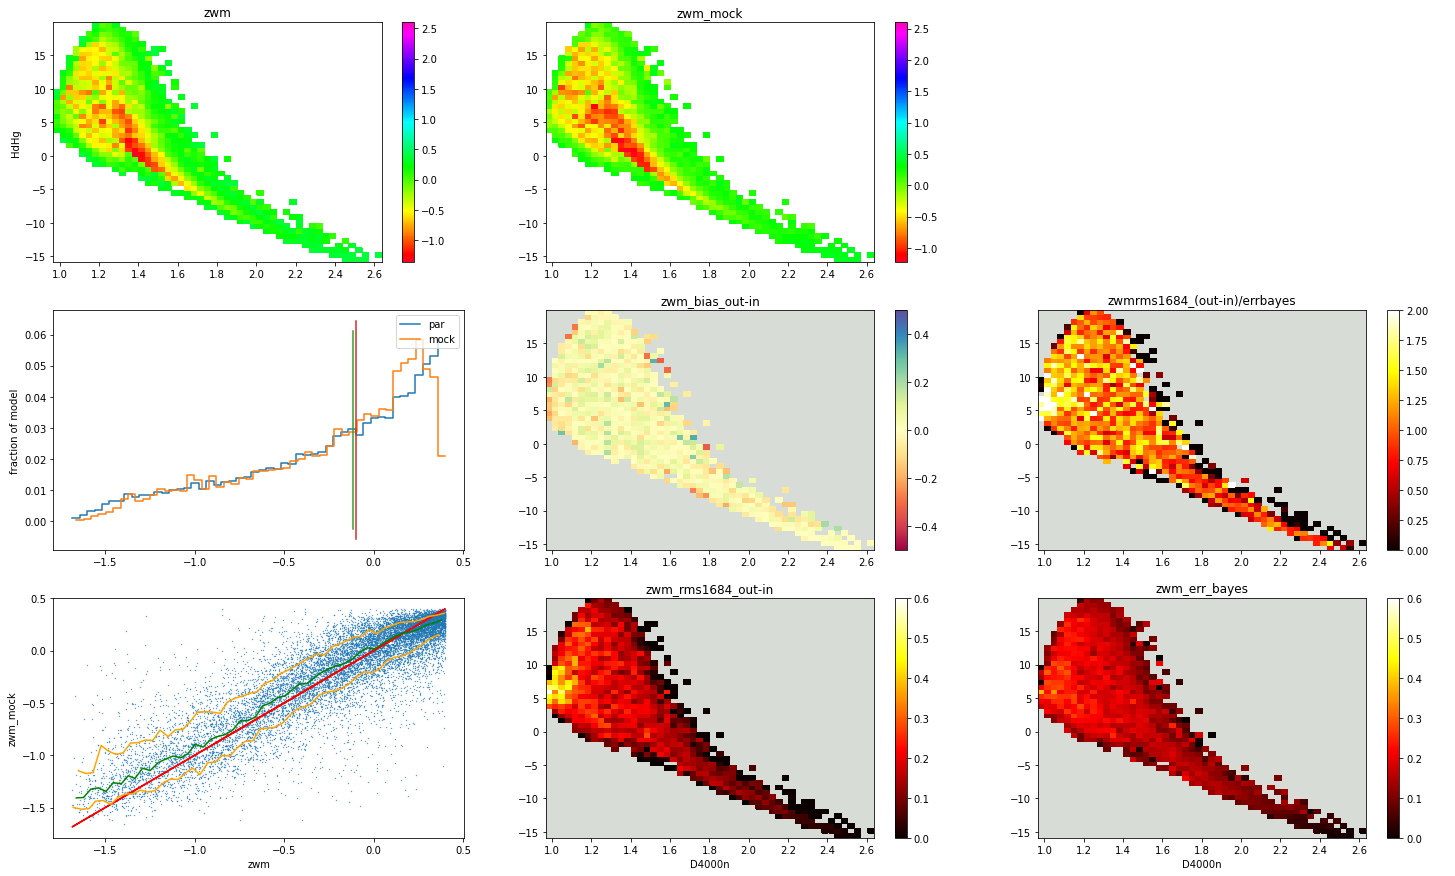

In [17]:
f_zwm=f_plt.density_map_5p(D4000n, hdhg, zstarwm, zstarwm_mock, zstarwm_err,par_name='zwm', x_label='D4000n', y_label='HdHg', vmin=[None, -0.5, 0.0, 0.0,0.0], vmax=[2.6, 0.5, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


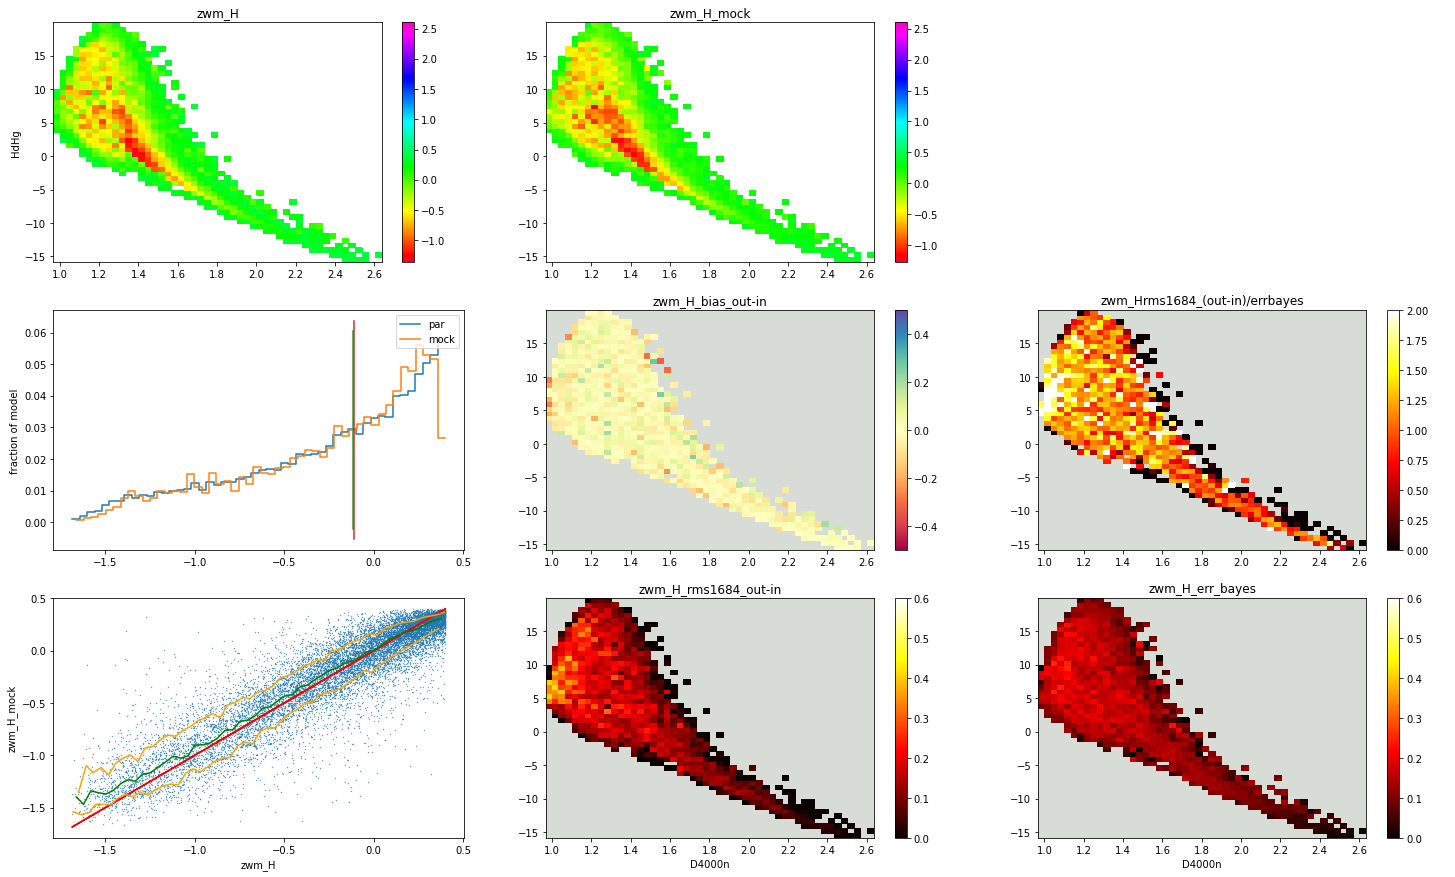

In [18]:
f_zwm_H=f_plt.density_map_5p(D4000n, hdhg, zstarwm, zstarwmH_mock, zstarwmH_err,par_name='zwm_H', x_label='D4000n', y_label='HdHg', vmin=[None, -0.5, 0.0, 0.0,0.0], vmax=[2.6, 0.5, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


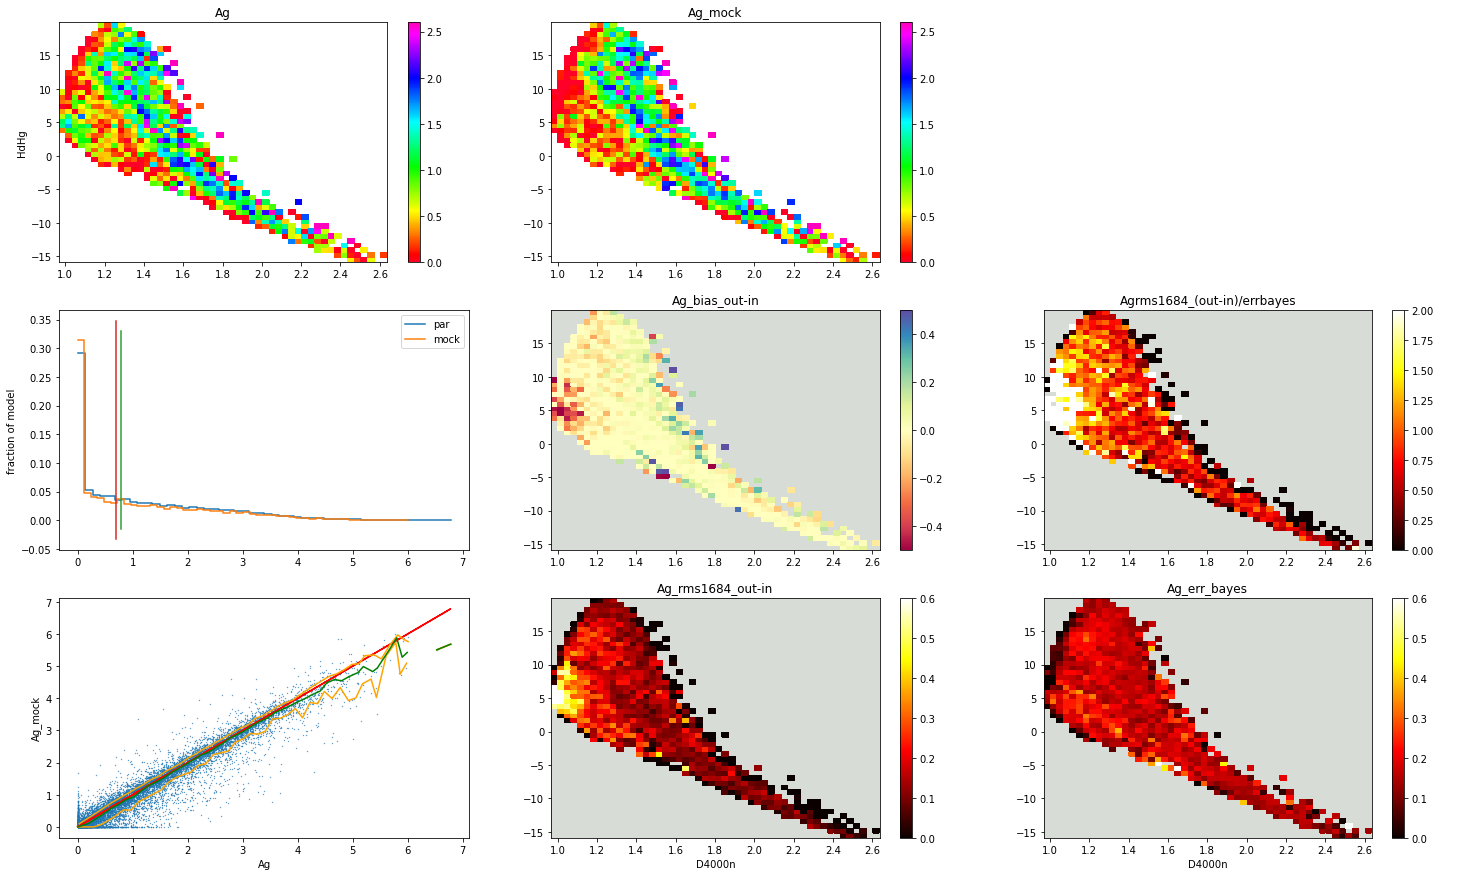

In [19]:
f_Ag=f_plt.density_map_5p(D4000n, hdhg, Ag, Ag_mock, Ag_err,par_name='Ag', x_label='D4000n', y_label='HdHg', vmin=[None, -0.5, 0.0, 0.0,0.0], vmax=[2.6, 0.5, 2.0,0.6,0.6], figsize=(25,15))

In [20]:
#f_Ag.savefig('/home/edoardo/Desktop/TESI/figure/mock_Ag.png')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


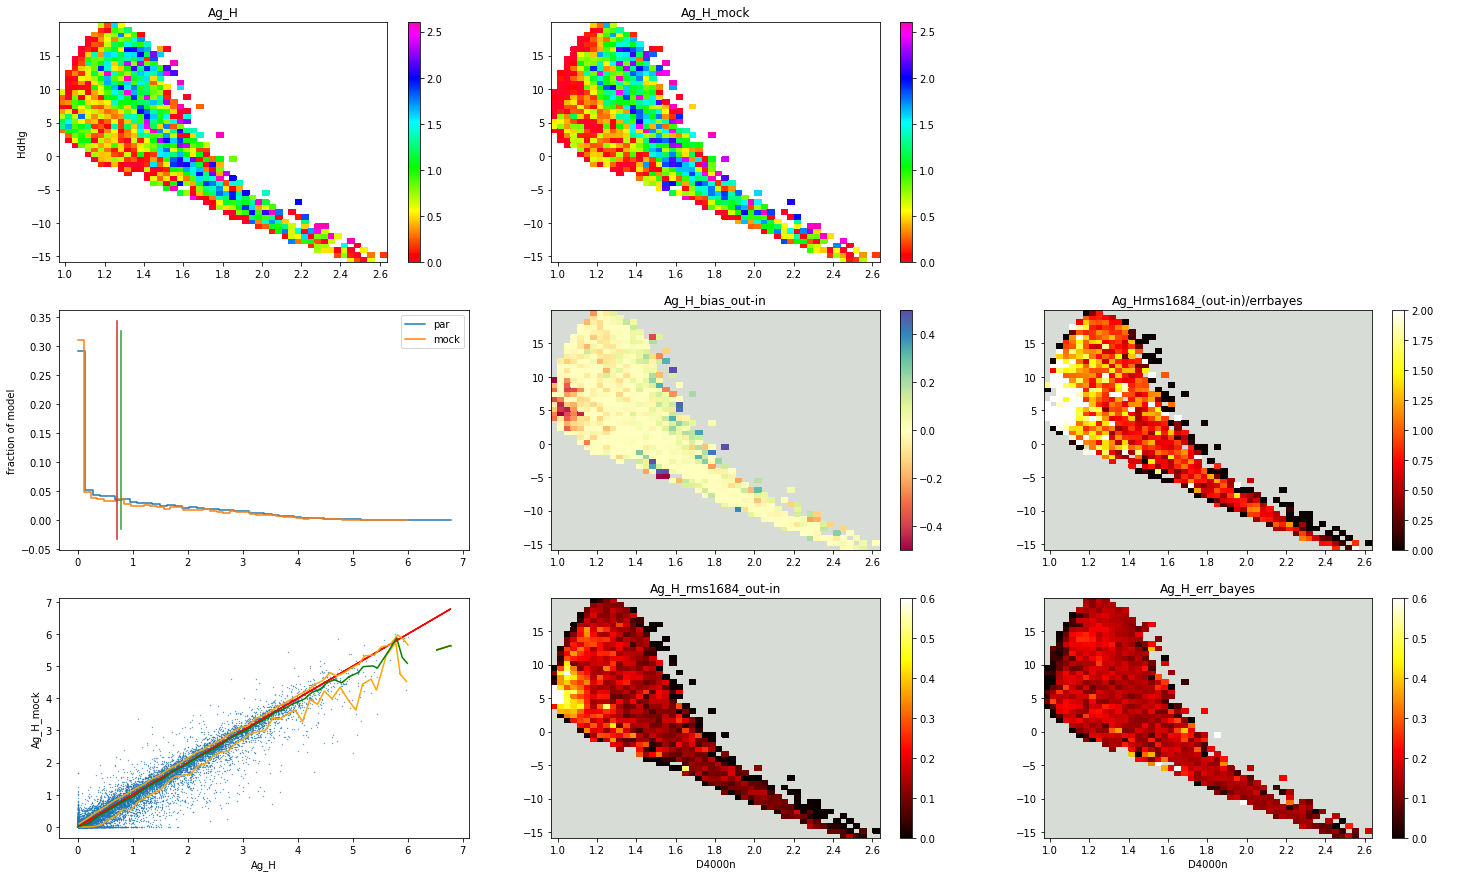

In [21]:
f_Ag_H=f_plt.density_map_5p(D4000n, hdhg, Ag, Ag_H_mock, Ag_H_err,par_name='Ag_H', x_label='D4000n', y_label='HdHg', vmin=[None, -0.5, 0.0, 0.0,0.0], vmax=[2.6, 0.5, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 1


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)


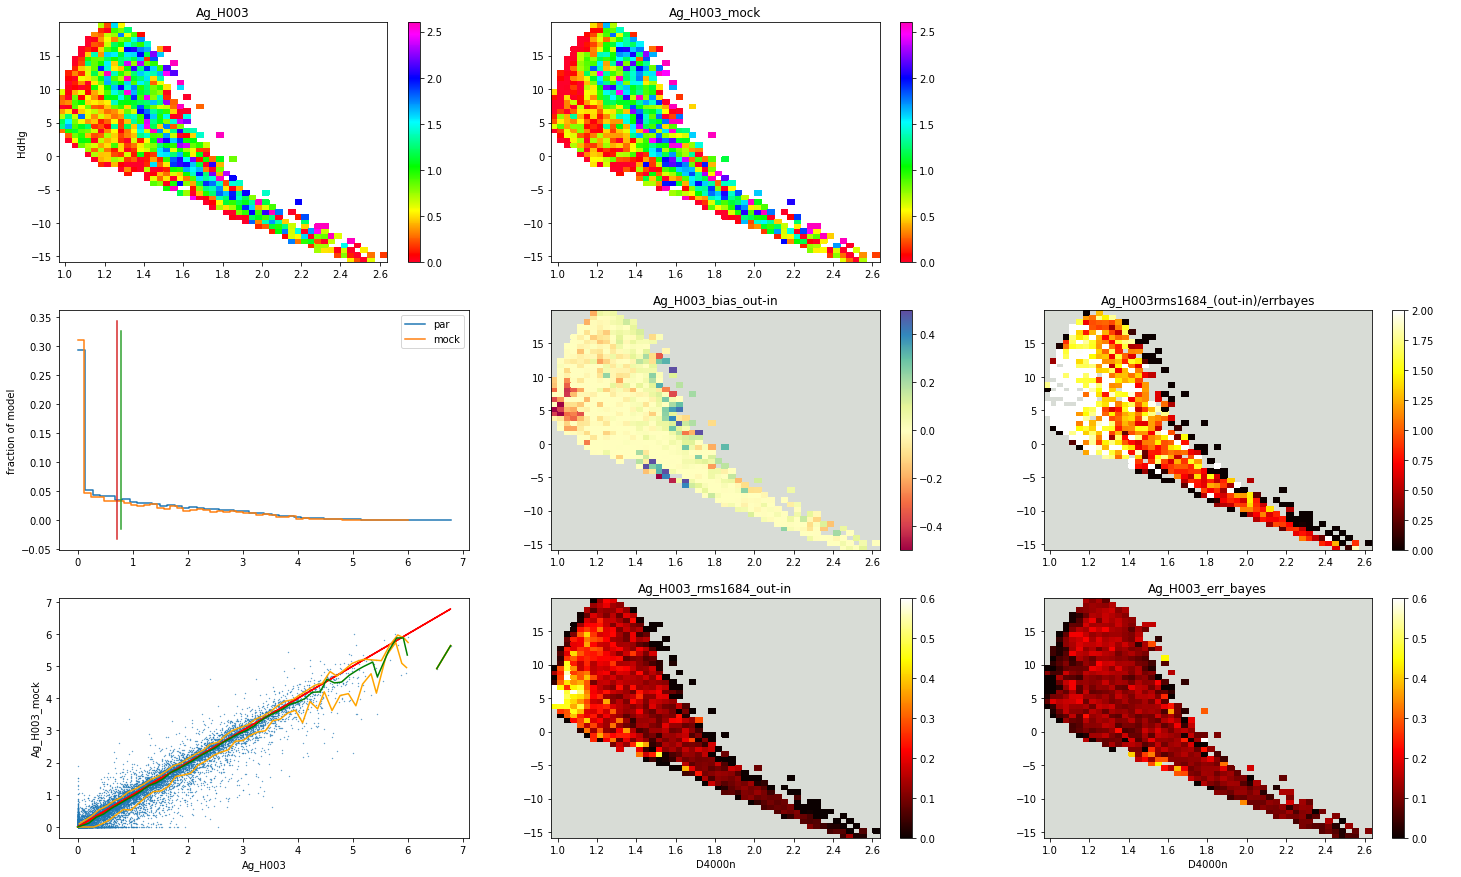

In [22]:
f_Ag_H003=f_plt.density_map_5p(D4000n, hdhg, Ag, Ag_H003_mock, Ag_H003_err,par_name='Ag_H003', x_label='D4000n', y_label='HdHg', vmin=[None, -0.5, 0.0, 0.0,0.0], vmax=[2.6, 0.5, 2.0,0.6,0.6], figsize=(25,15))

In [23]:
#f_Ag_H.savefig('/home/edoardo/Desktop/TESI/figure/mock_Ag_H.png')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


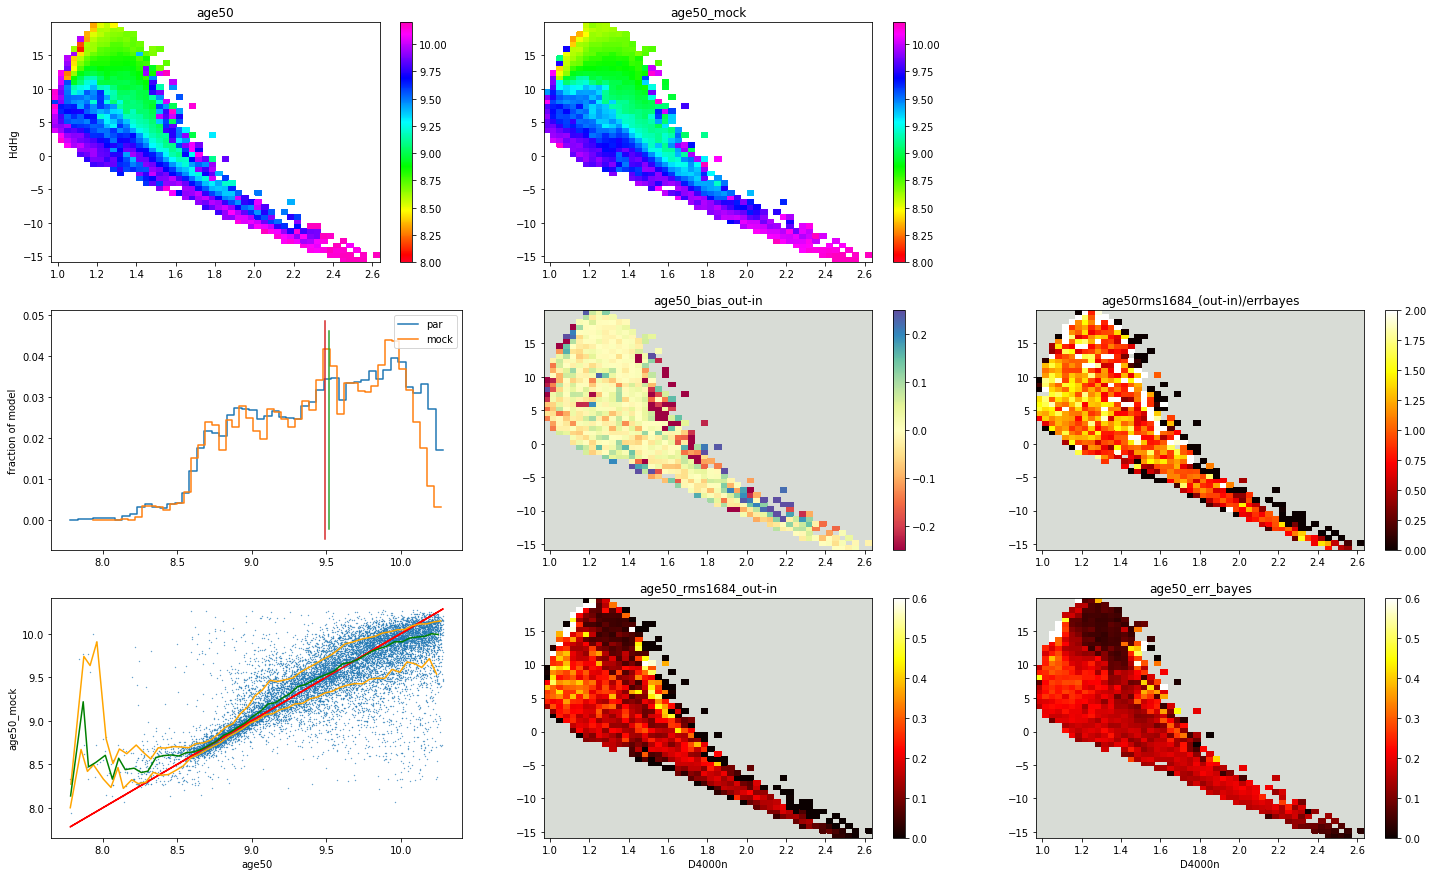

In [24]:
f_50=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50), age50_mock, age50_err,par_name='age50', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.25, 0.0, 0.0,0.0], vmax=[10.2, 0.25, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


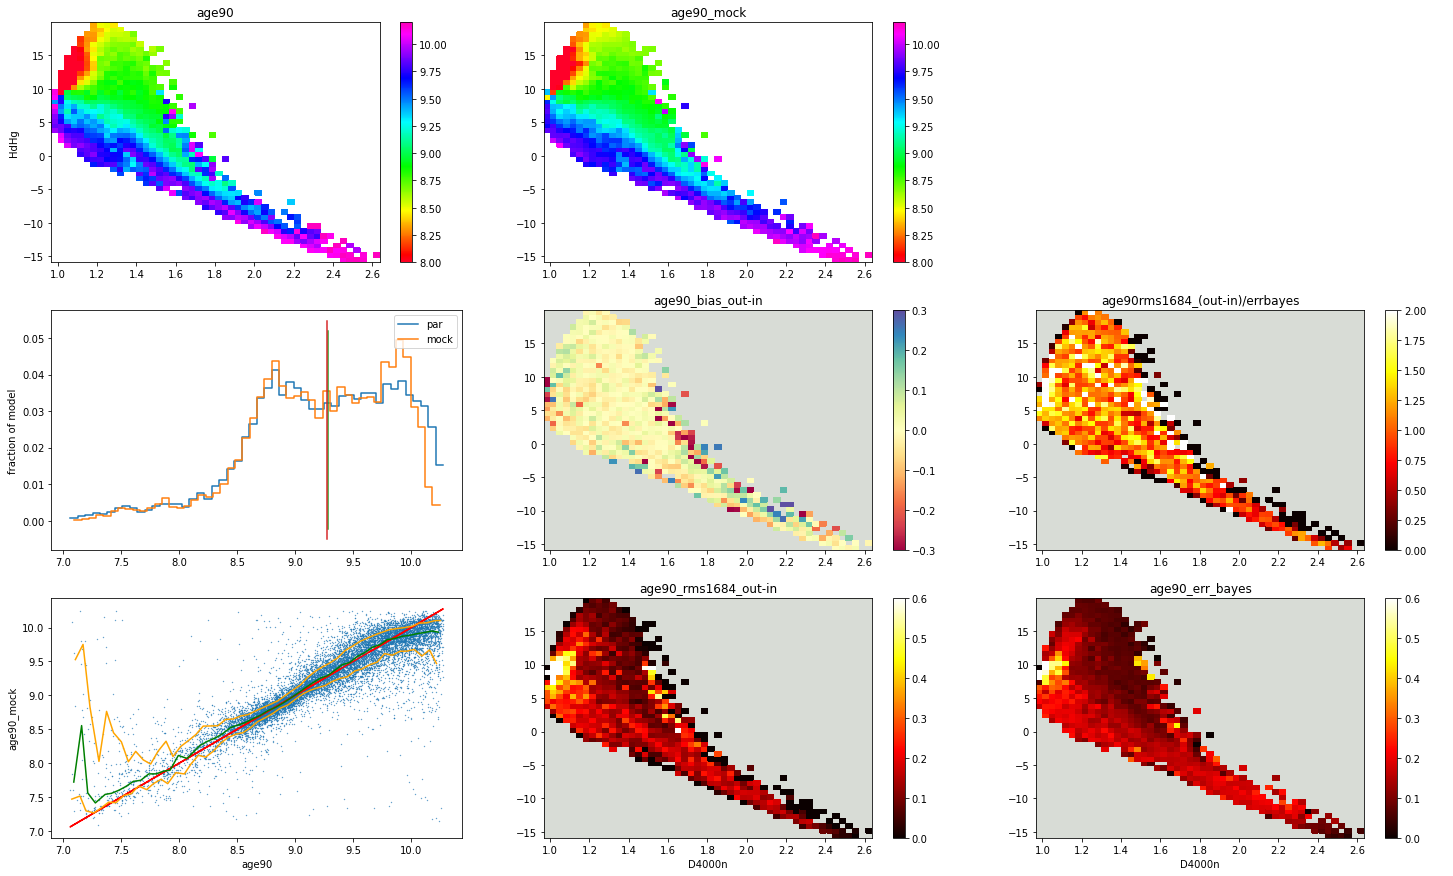

In [25]:
f_90=f_plt.density_map_5p(D4000n, hdhg, np.log10(age90), age90_mock, age90_err,par_name='age90', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.3, 0.0, 0.0,0.0], vmax=[10.2, 0.3, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


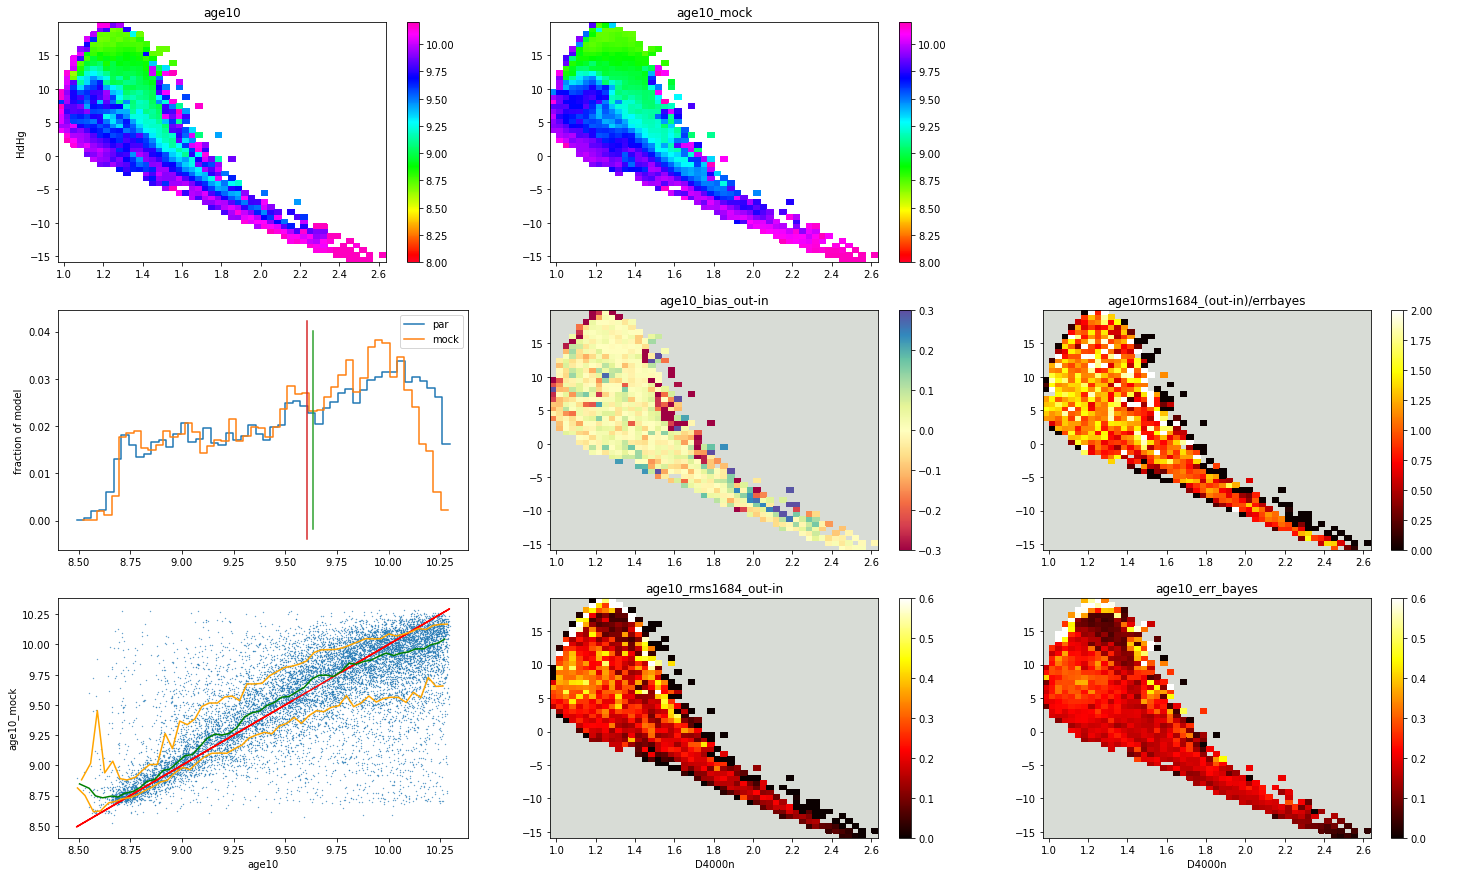

In [26]:
f_10=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10), age10_mock, age10_err,par_name='age10', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.3, 0.0, 0.0,0.0], vmax=[10.2, 0.3, 2.0,0.6,0.6], figsize=(25,15))

In [27]:
#f_50.savefig('/home/edoardo/Desktop/TESI/figure/mock_age50.png')

In [28]:
#f_10.savefig('/home/edoardo/Desktop/TESI/figure/mock_age10.png')
#f_90.savefig('/home/edoardo/Desktop/TESI/figure/mock_age90.png')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


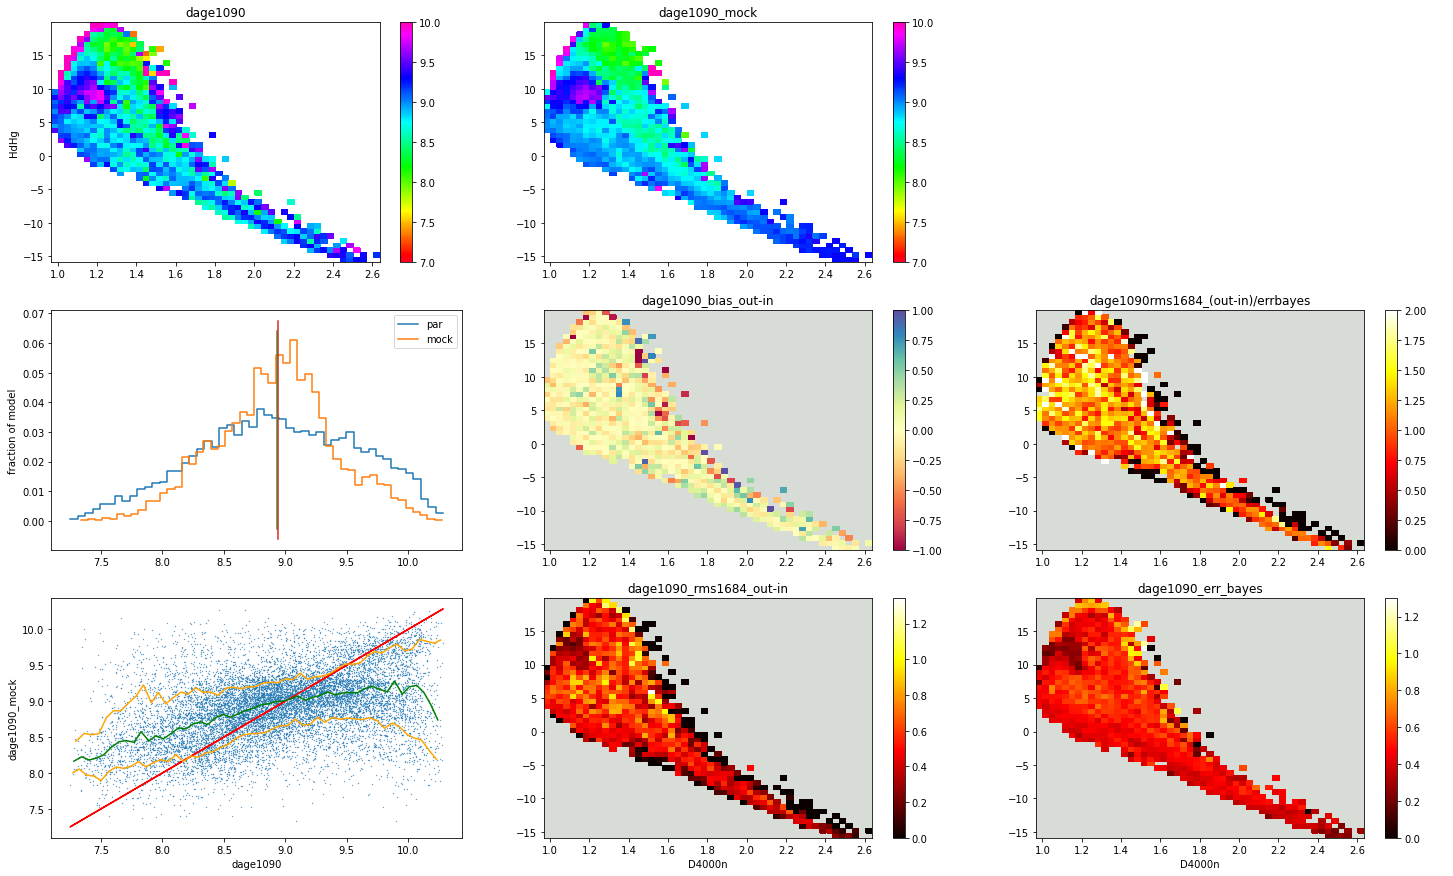

In [29]:
f_1090=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age90), np.log10(dage1090_mock), (dage1090_err),par_name='dage1090', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

In [30]:
#f_1090.savefig('/home/edoardo/Desktop/TESI/figure/mock_dage1090.png')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


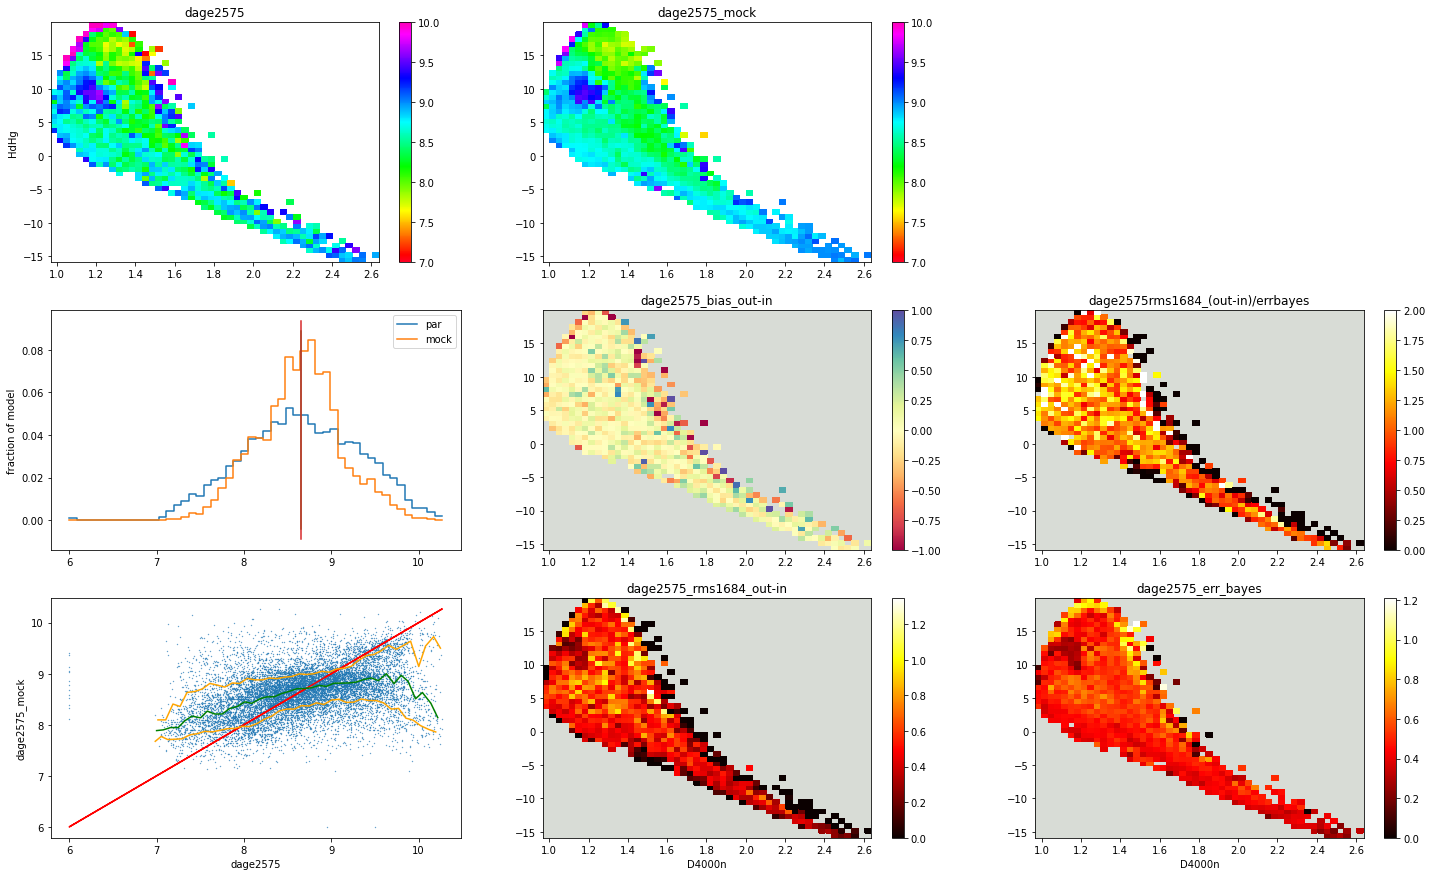

In [31]:
f_2575=f_plt.density_map_5p(D4000n, hdhg, np.log10(age25-age75+10**6), np.log10(dage2575_mock+10**6), (dage2575_err),par_name='dage2575', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


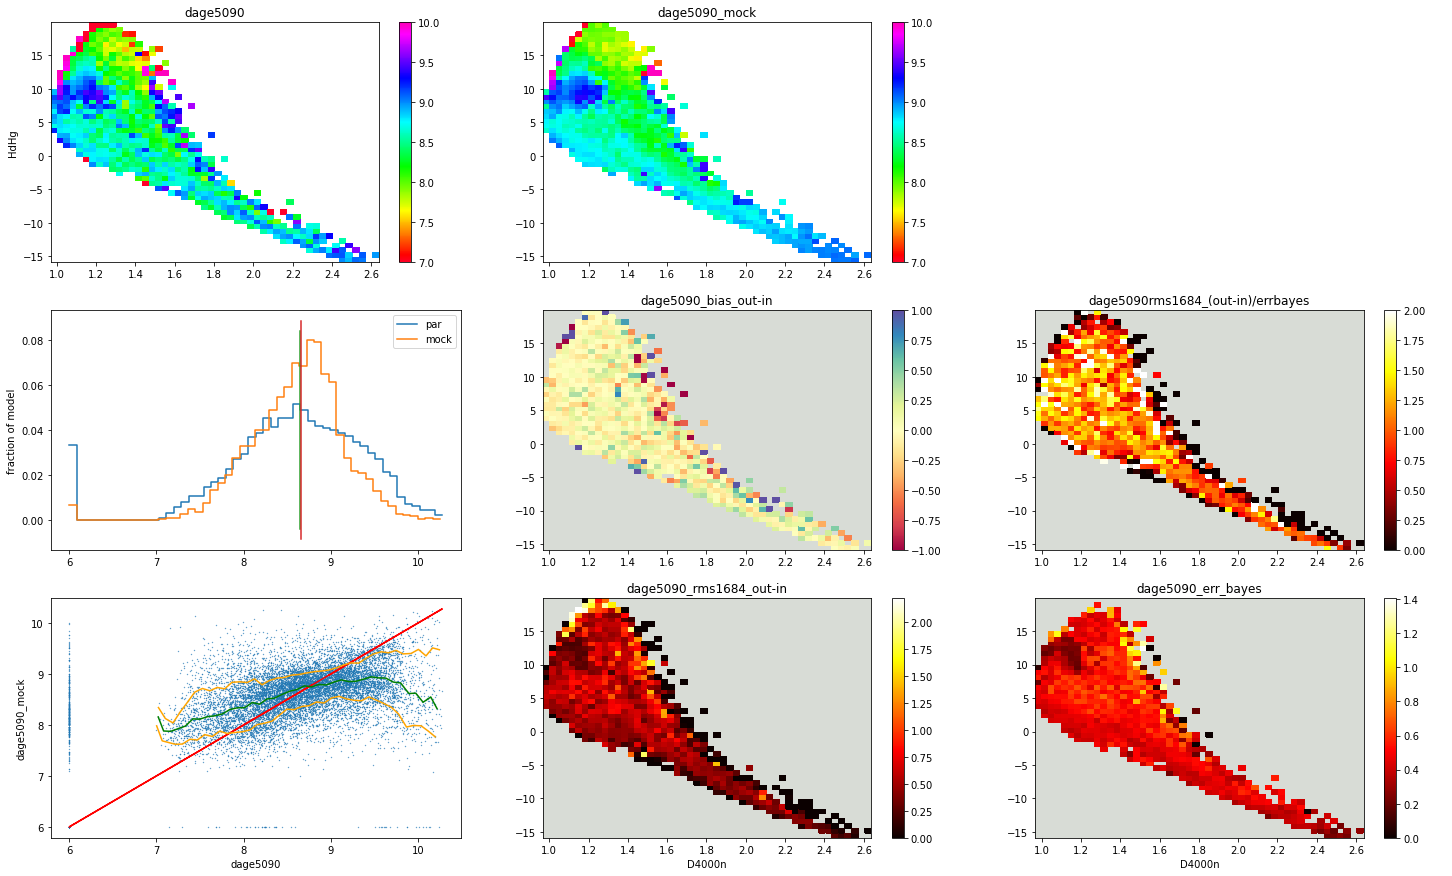

In [32]:
f_5090=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50-age90+10**6), np.log10(dage5090_mock+10**6), (dage5090_err),par_name='dage5090', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


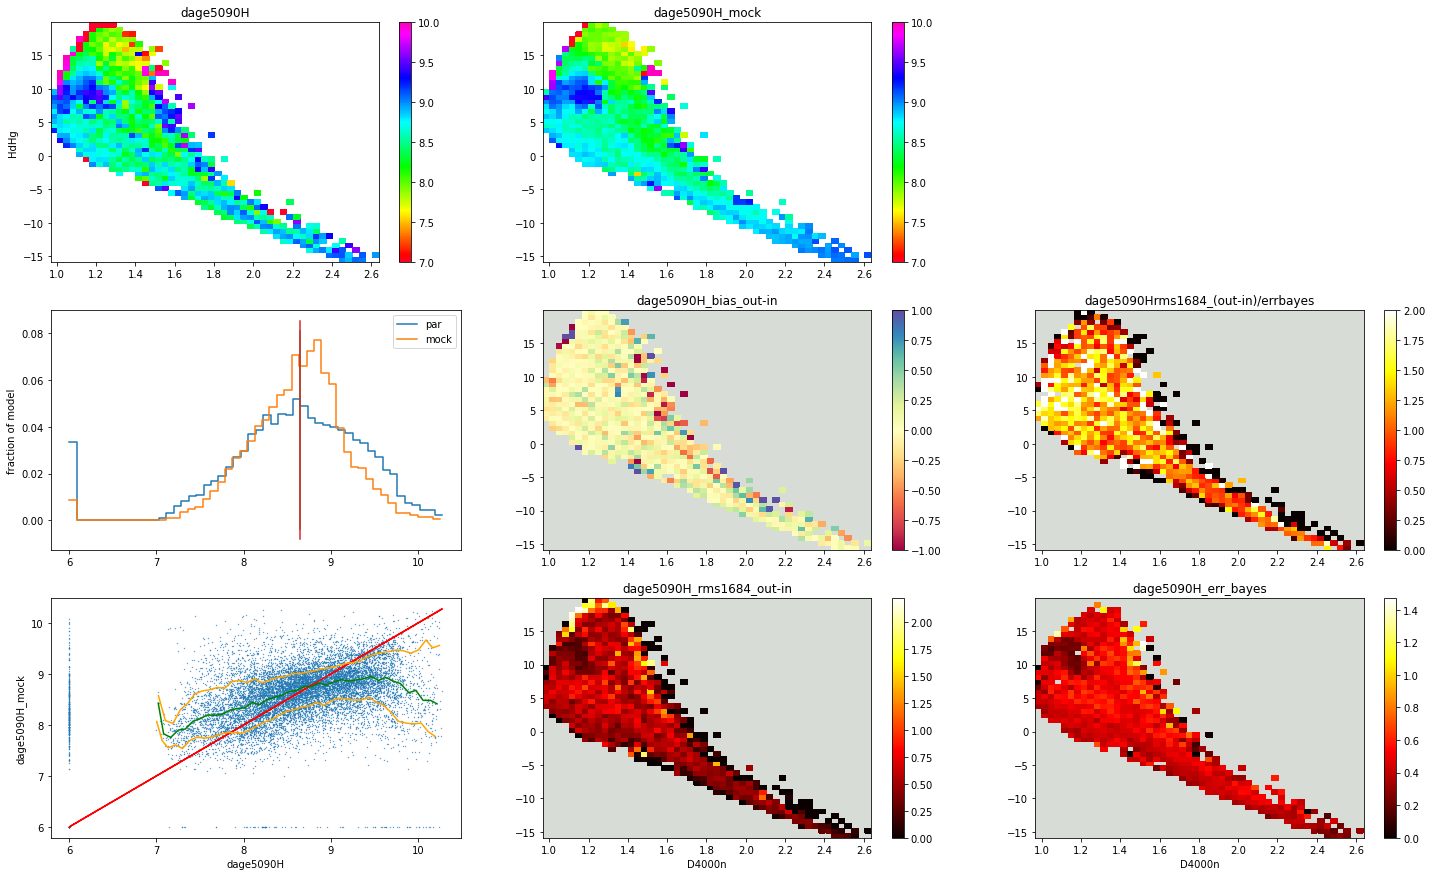

In [33]:
f_5090H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50-age90+10**6), np.log10(dage5090H_mock+10**6), (dage5090H_err),par_name='dage5090H', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


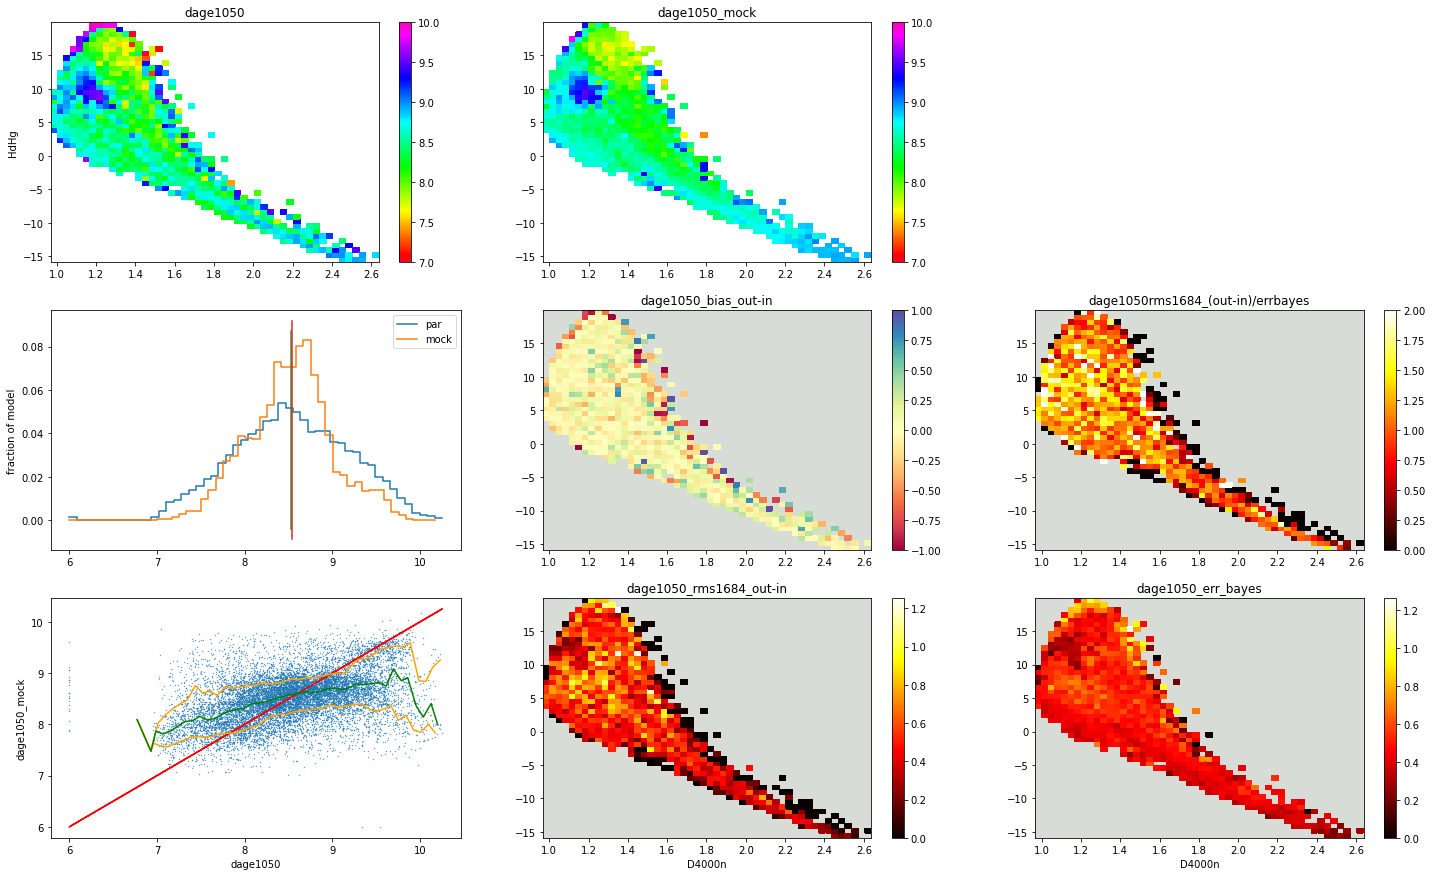

In [34]:
f_1050=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age50+10**6), np.log10(dage1050_mock+10**6), (dage1050_err),par_name='dage1050', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


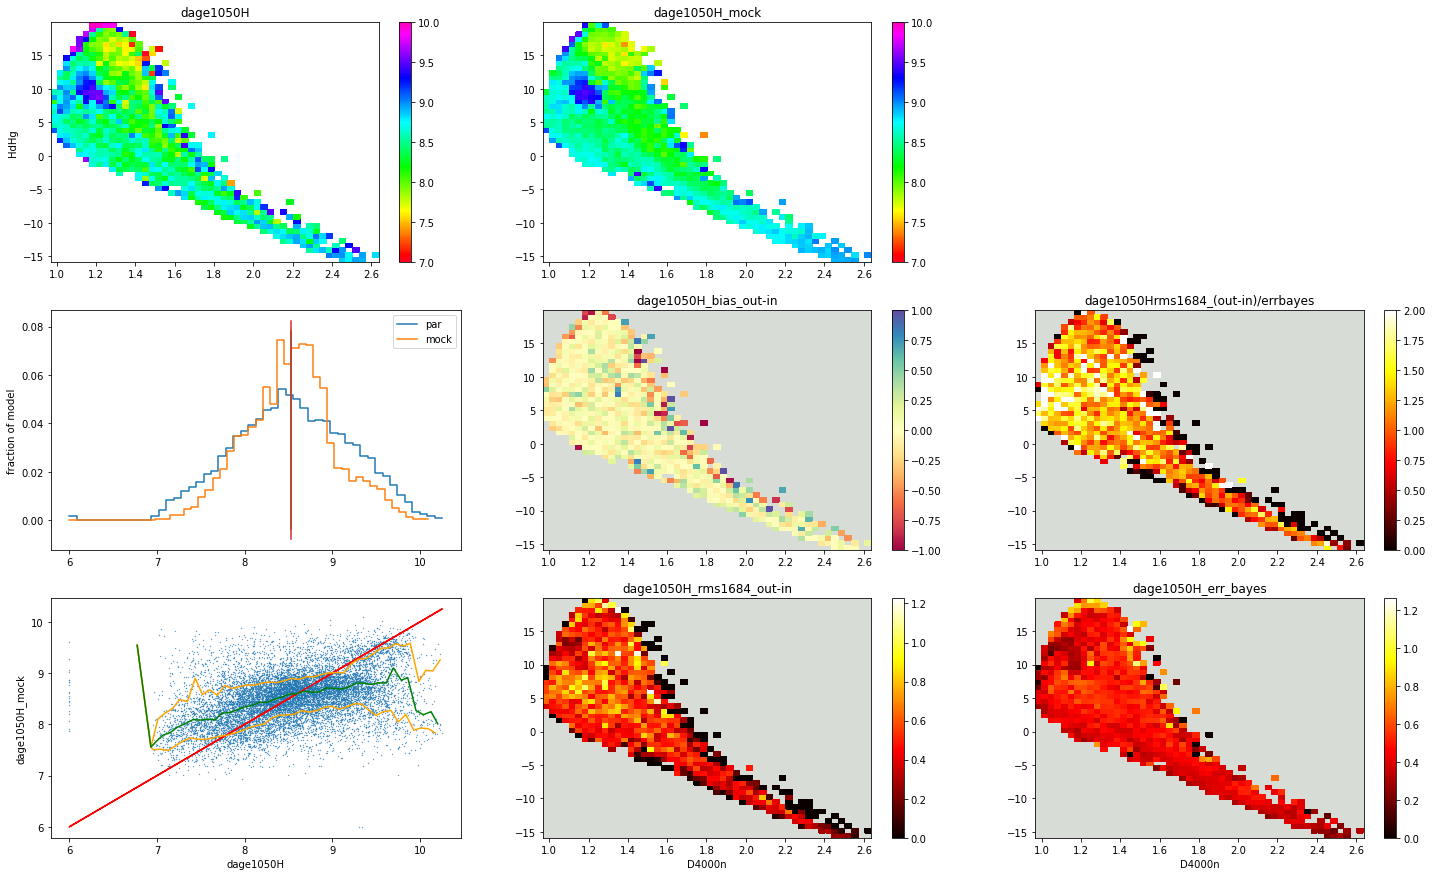

In [35]:
f_1050H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age50+10**6), np.log10(dage1050H_mock+10**6), (dage1050H_err),par_name='dage1050H', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2, None,None], figsize=(25,15))

<ipython-input-36-2ba5bc1a38c4>:1: RuntimeWarning: divide by zero encountered in log10
  f_diff=f_plt.diff_density_map(D4000n, hdhg, np.log10(dage1050_mock), np.log10(dage5090_mock),statistic='median',name1='d1050',name2='d5090',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.5,vmax=0.5 )


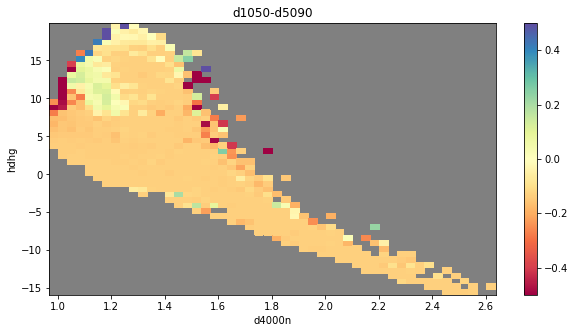

In [36]:
f_diff=f_plt.diff_density_map(D4000n, hdhg, np.log10(dage1050_mock), np.log10(dage5090_mock),statistic='median',name1='d1050',name2='d5090',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.5,vmax=0.5 )

<ipython-input-37-5752757d645e>:1: RuntimeWarning: divide by zero encountered in log10
  f_diffH=f_plt.diff_density_map(D4000n, hdhg, np.log10(dage1050H_mock), np.log10(dage5090H_mock),statistic='median',name1='d1050H',name2='d5090H',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.5,vmax=0.5 )


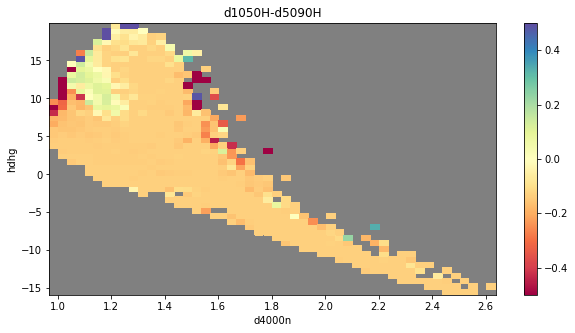

In [37]:
f_diffH=f_plt.diff_density_map(D4000n, hdhg, np.log10(dage1050H_mock), np.log10(dage5090H_mock),statistic='median',name1='d1050H',name2='d5090H',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.5,vmax=0.5 )

<ipython-input-38-d2d38f8bb70d>:1: RuntimeWarning: divide by zero encountered in log10
  f_diff=f_plt.diff_density_map(D4000n, hdhg, np.log10(dage1050_mock), np.log10(dage5090_mock),statistic=f_plt.rms_1684,name1='d1050',name2='d5090',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=0.0,vmax=0.2 )
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


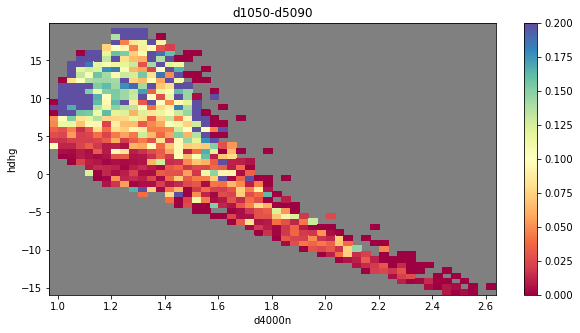

In [38]:
f_diff=f_plt.diff_density_map(D4000n, hdhg, np.log10(dage1050_mock), np.log10(dage5090_mock),statistic=f_plt.rms_1684,name1='d1050',name2='d5090',xlabel='d4000n',ylabel='hdhg',figsize=(10,5),vmin=0.0,vmax=0.2 )

Now, we select 4 samples of models with a different range of age50 and we are going to see how well the prior is reproduced

total deleted (no finite values): 0


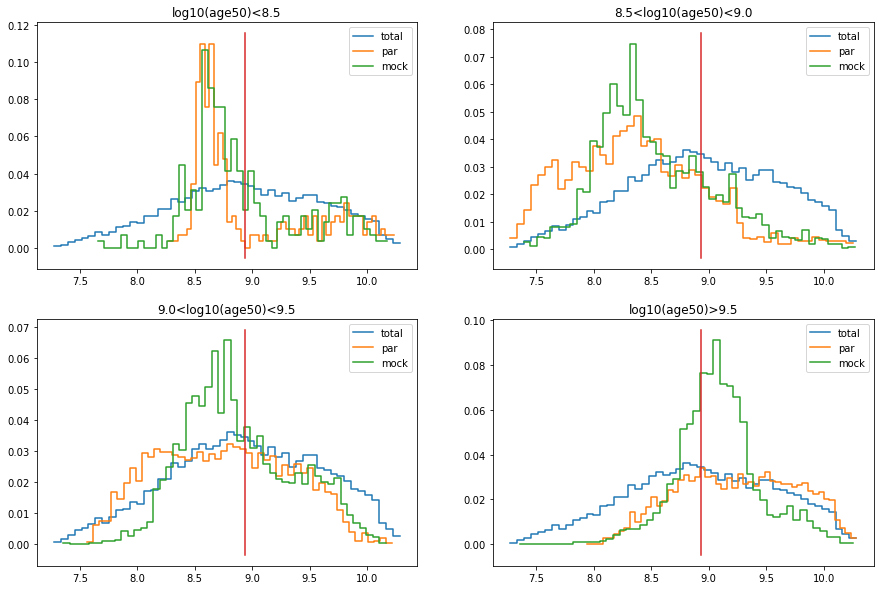

In [39]:
f_prior=f_plt.prior_comp(np.log10(age50), np.log10(age10-age90+10**6),np.log10(dage1090_mock+10**6), limits=[8.5,9.0,9.5], name_binned_par='log10(age50)' )

Once we have saw the prior, we see the "linear" relation between our measures and the models...

total deleted (no finite values): 0


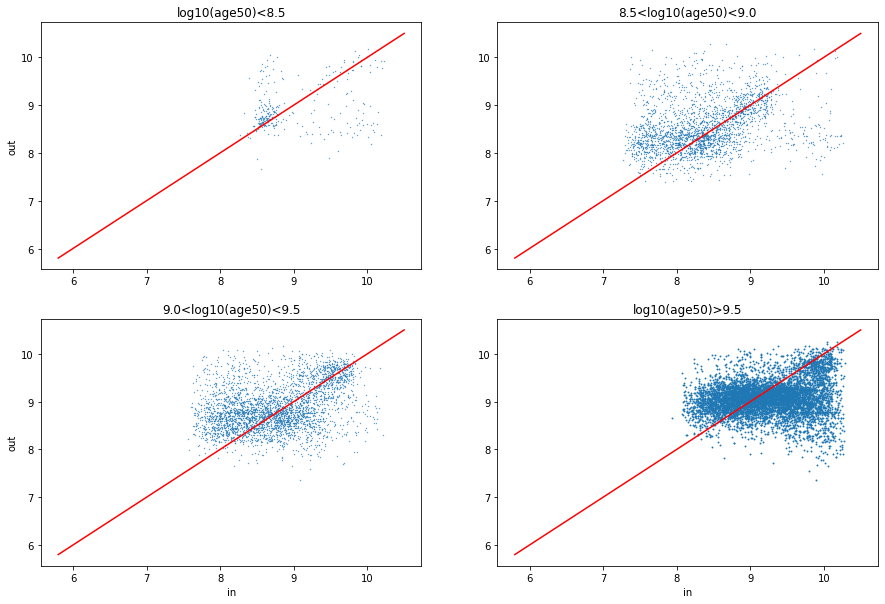

In [40]:
f_scatter=f_plt.scatter_comp(np.log10(age50), np.log10(age10-age90+10**6),np.log10(dage1090_mock+10**6), limits=[8.5,9.0,9.5], name_binned_par='log10(age50)' )

In [41]:
#f_scatter.savefig('/home/edoardo/Desktop/TESI/figure/mock_dage1090w50.png')

In [42]:
_i=np.argwhere(np.logical_and(np.logical_and((np.log10(age50)>9.5),(np.log10(age10-age90+10**6)>9.5) ), (np.log10(dage1090_mock+10**6)>9.5)) )
_idx=_i.reshape(np.shape(_i)[0])         

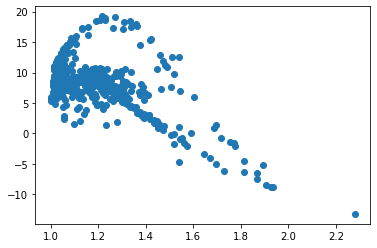

In [43]:
plt.scatter(D4000n[_idx], hdhg[_idx])

In [44]:
i=np.argwhere(np.logical_and(np.logical_and(np.logical_and((np.log10(age50)<9.0),(np.log10(age10-age90+10**6)>8.7) ), (np.log10(dage1090_mock+10**6)>8.7)), (np.log10(age50)>8.5)))
idx=i.reshape(np.shape(i)[0])         

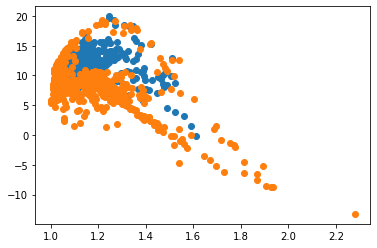

In [45]:
plt.scatter(D4000n[idx], hdhg[idx])
plt.scatter(D4000n[_idx], hdhg[_idx])

It seems that when dage1090 is of the order of age50, we have a better linear relation between our measures and the models...

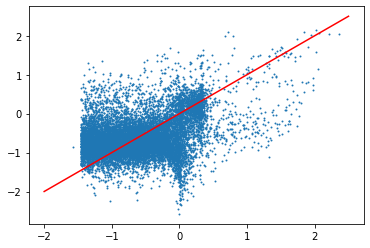

In [46]:
plt.scatter(np.log10(age10-age90)-np.log10(age50), np.log10(dage1090_mock)-np.log10(age50), s=0.9)
plt.plot([-2.0,2.5], [-2.0,2.5], color='red')

In [47]:
istpar_tot=np.histogram(np.log10(age10-age90)-np.log10(age50),bins=50)
frac_partot=istpar_tot[0]/np.size((np.log10(age10-age90)-np.log10(age50)))
frac_partot=np.append(frac_partot[0],frac_partot)

Text(0.5, 0, 'log10((age10-age90)/age50)')

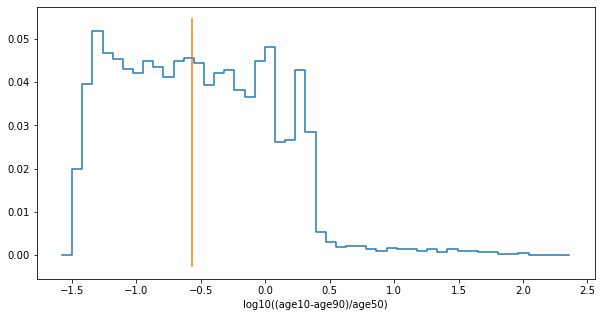

In [48]:
fig, axs=plt.subplots(figsize=(10,5))
axs.step(istpar_tot[1],frac_partot)
median_d1090_50=np.median(np.log10(age10-age90)-np.log10(age50))
axs.plot([median_d1090_50, median_d1090_50], axs.get_ylim())
axs.set_xlabel('log10((age10-age90)/age50)')

total deleted (no finite values): 0


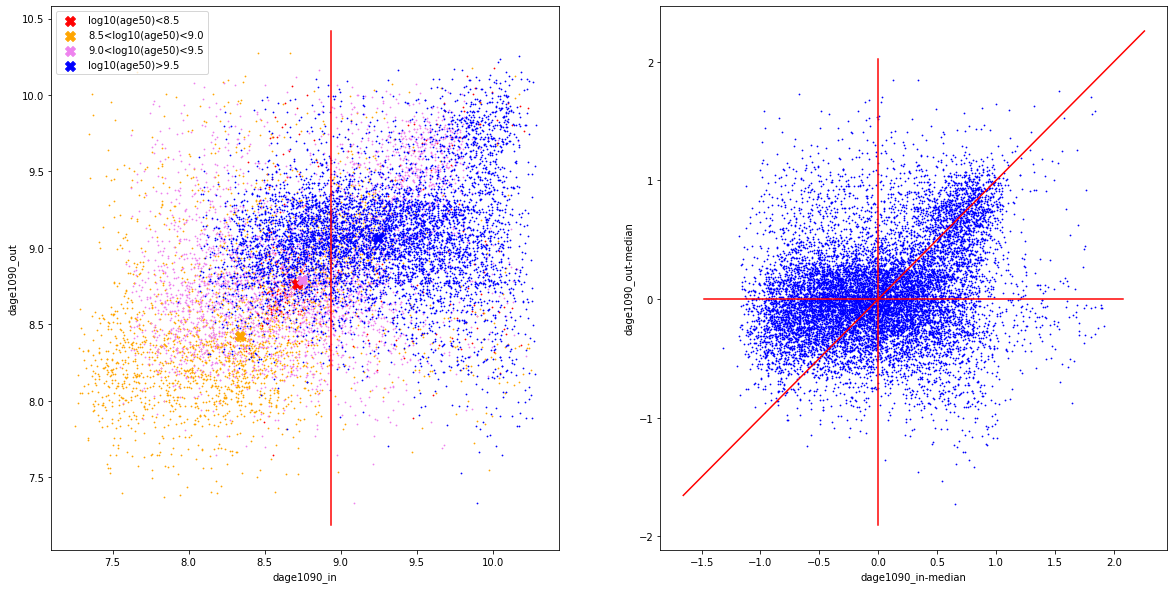

In [49]:
f_plt.scatter_norm(np.log10(age50), np.log10(age10-age90), np.log10(dage1090_mock), limits=[8.5,9.0,9.5], figsize=(20,10), name_binned_par='log10(age50)', name_par='dage1090')


total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


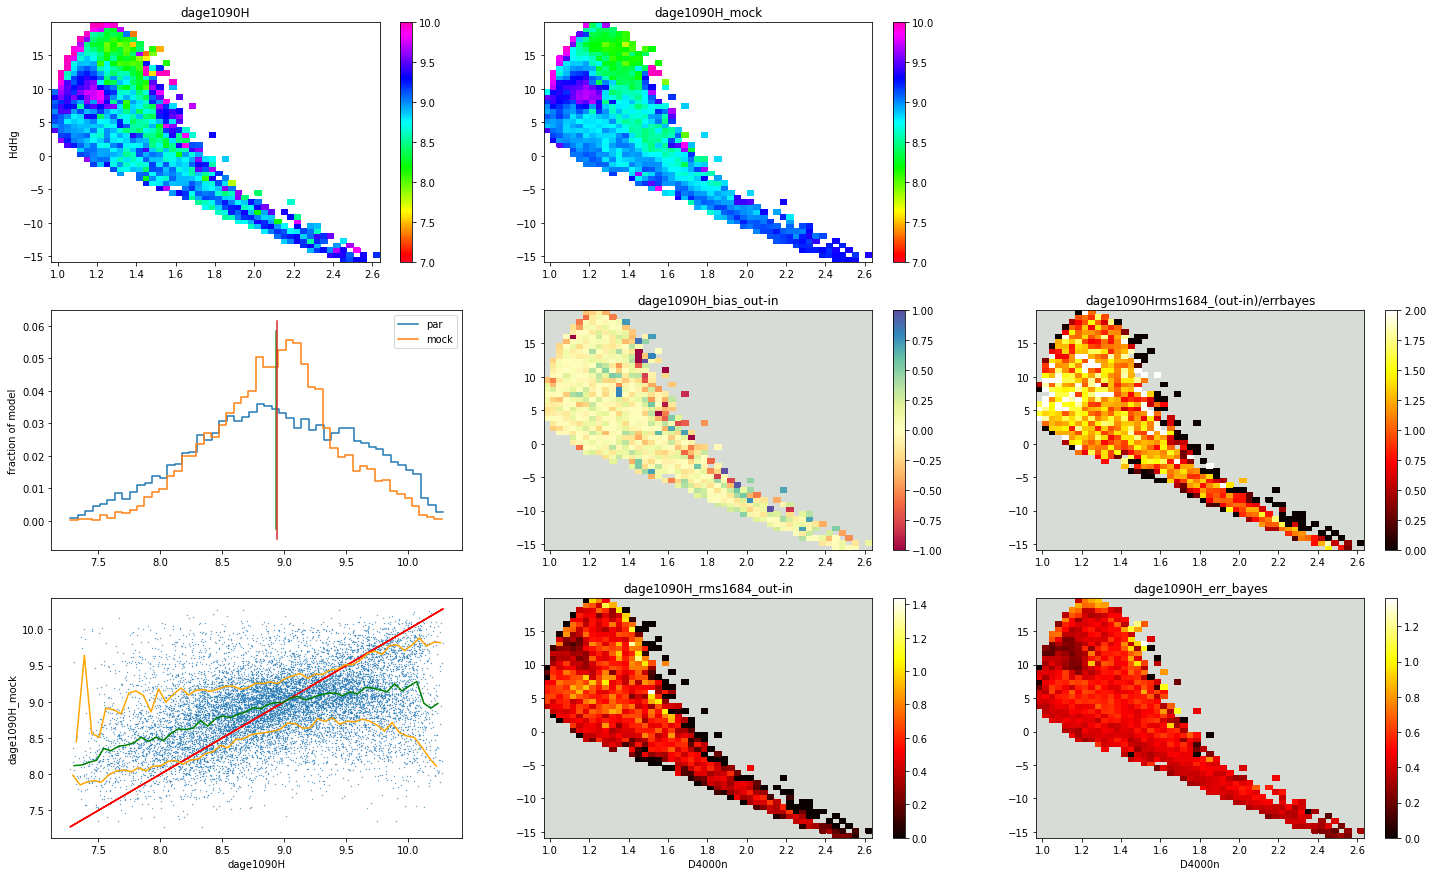

In [50]:
f_1090H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age90+10**6), np.log10(dage1090H_mock+10**6), (dage1090H_err),par_name='dage1090H', x_label='D4000n', y_label='HdHg', vmin=[7,-1, 0.0, None,None], vmax=[10,1, 2.0, None,None], figsize=(25,15))

In [51]:
#f_1090H.savefig('/home/edoardo/Desktop/TESI/figure/mock_dage1090H.png')

total deleted (no finite values): 0


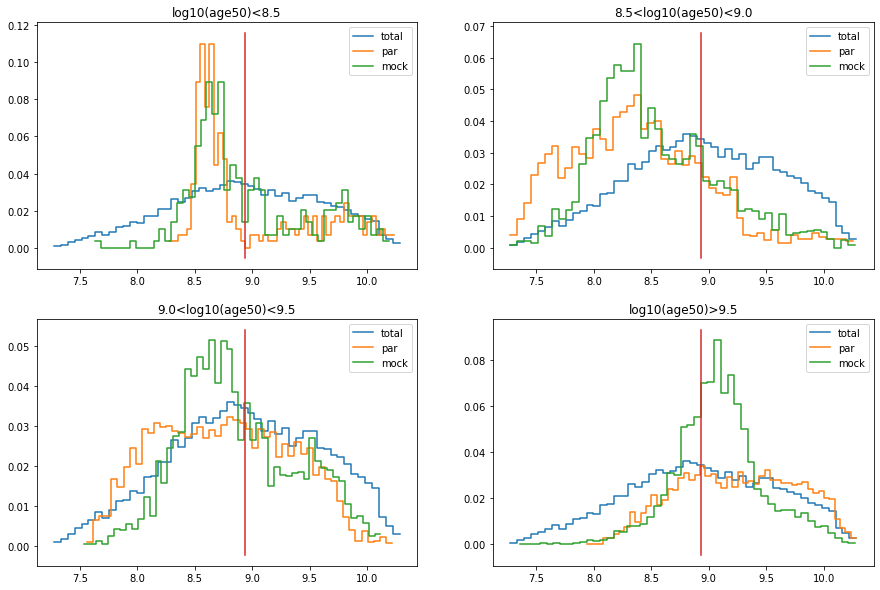

In [52]:
fig1090H=f_plt.prior_comp(np.log10(age50), np.log10(age10-age90+10**6),np.log10(dage1090H_mock+10**6), limits=[8.5,9.0,9.5], name_binned_par='log10(age50)' )

total deleted (no finite values): 0


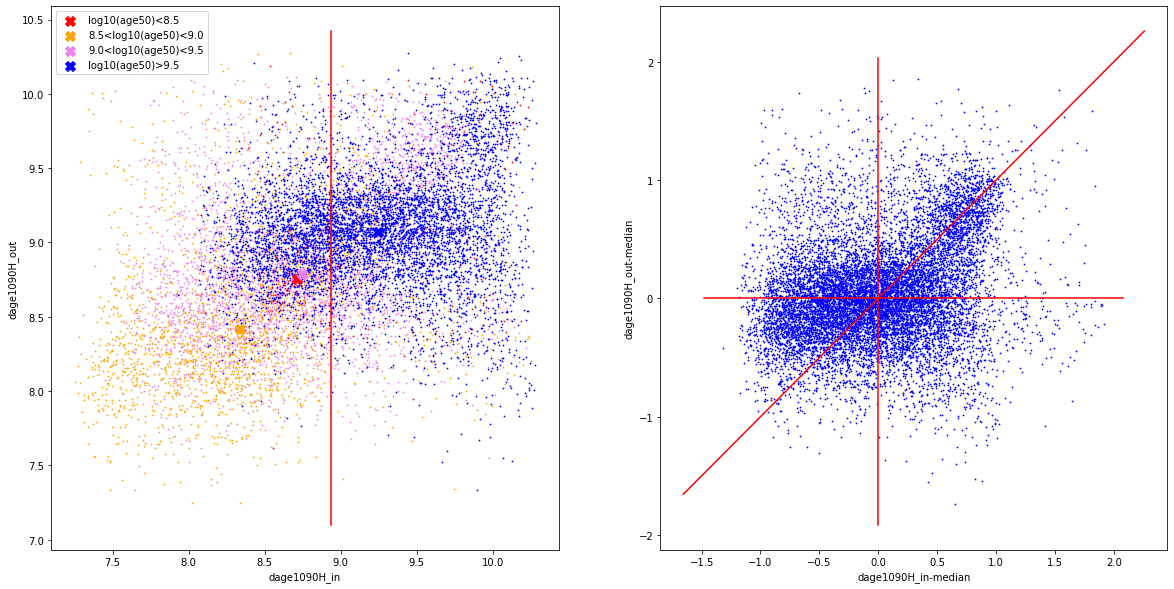

In [53]:
f_plt.scatter_norm(np.log10(age50), np.log10(age10-age90), np.log10(dage1090H_mock), limits=[8.5,9.0,9.5], figsize=(20,10), name_binned_par='log10(age50)', name_par='dage1090H')


total deleted (no finite values): 0


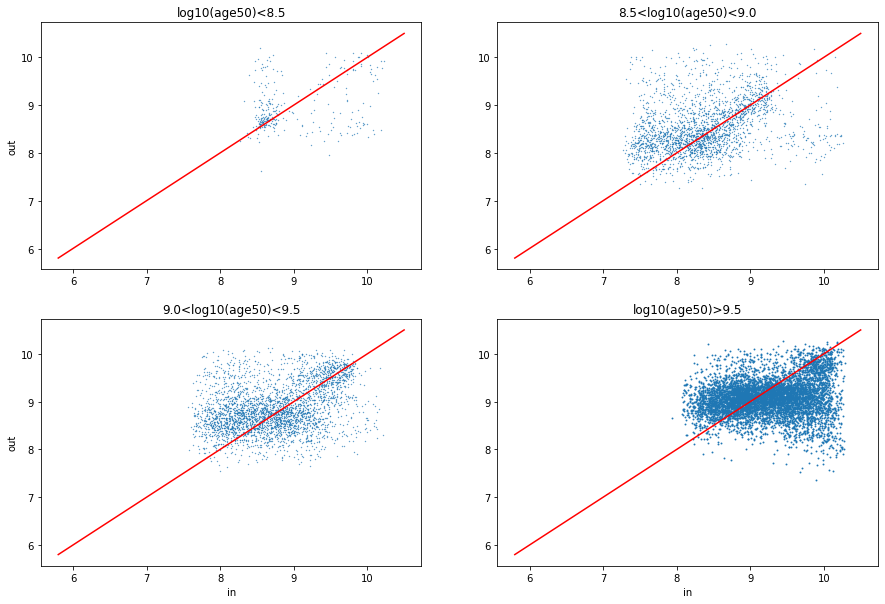

In [54]:
f_scatterH=f_plt.scatter_comp(np.log10(age50), np.log10(age10-age90+10**6),np.log10(dage1090H_mock+10**6), limits=[8.5,9.0,9.5], name_binned_par='log10(age50)' )

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


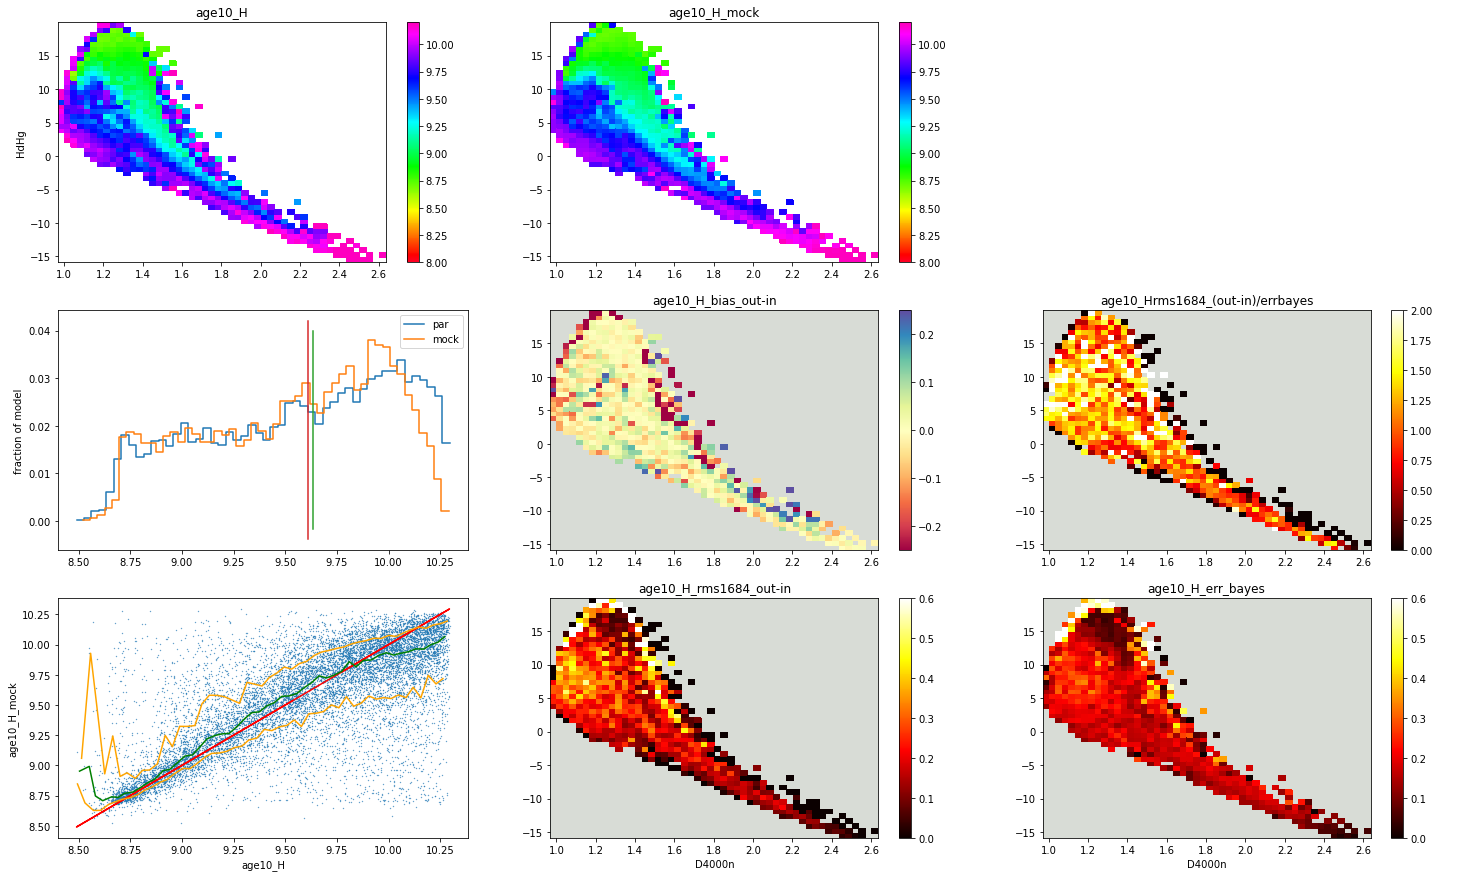

In [55]:
f_10H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10), age10H_mock, age10H_err,par_name='age10_H', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.25, 0.0, 0.0,0.0], vmax=[10.2, 0.25, 2.0,0.6,0.6], figsize=(25,15))

In [56]:
#f_10H.savefig('/home/edoardo/Desktop/TESI/figure/mock_age10H.png')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


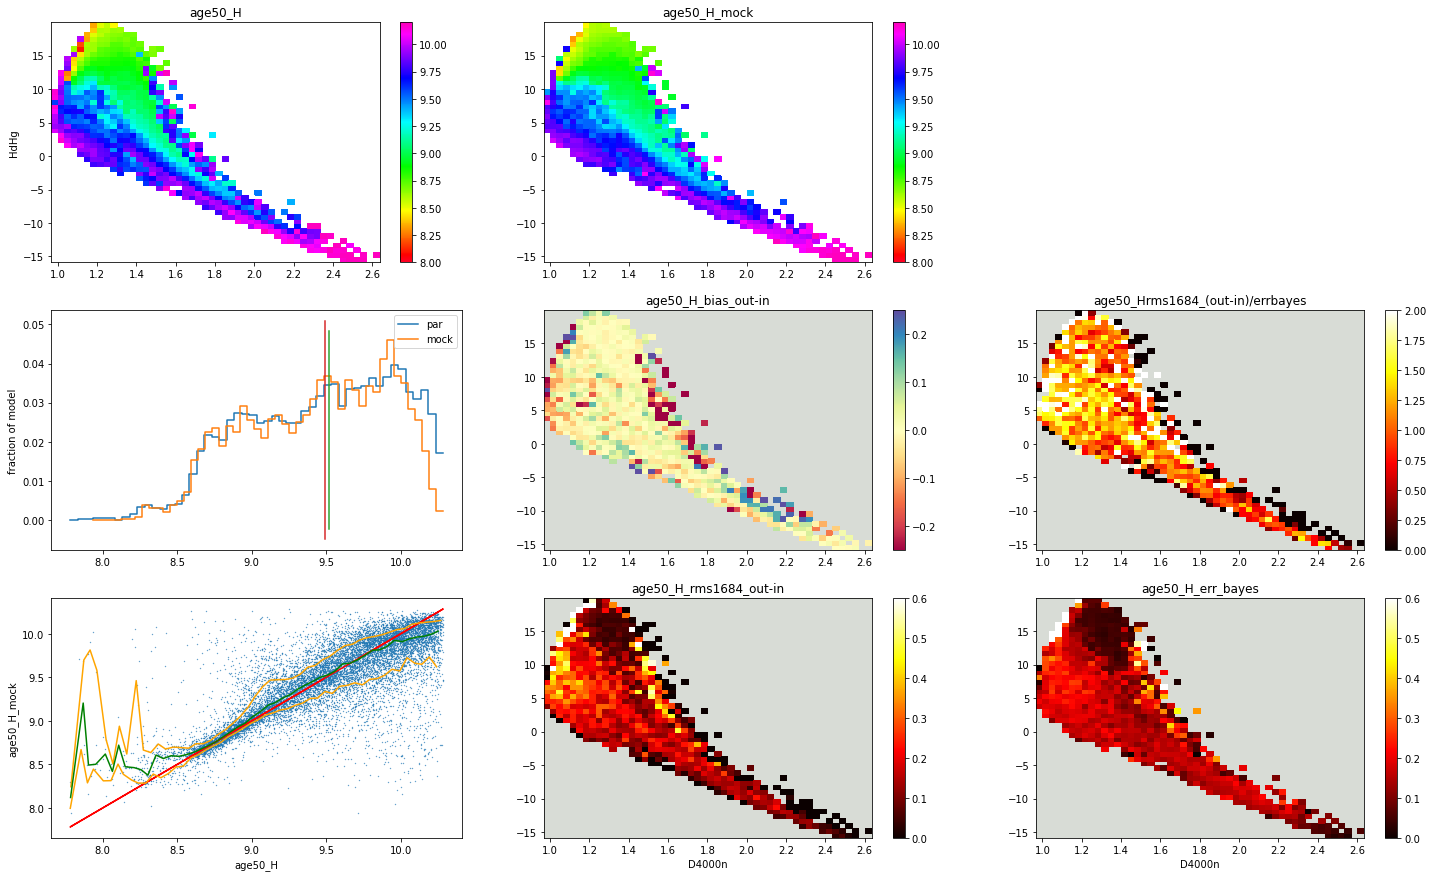

In [57]:
f_50H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50), age50H_mock, age50H_err,par_name='age50_H', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.25, 0.0, 0.0,0.0], vmax=[10.2, 0.25, 2.0,0.6,0.6], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


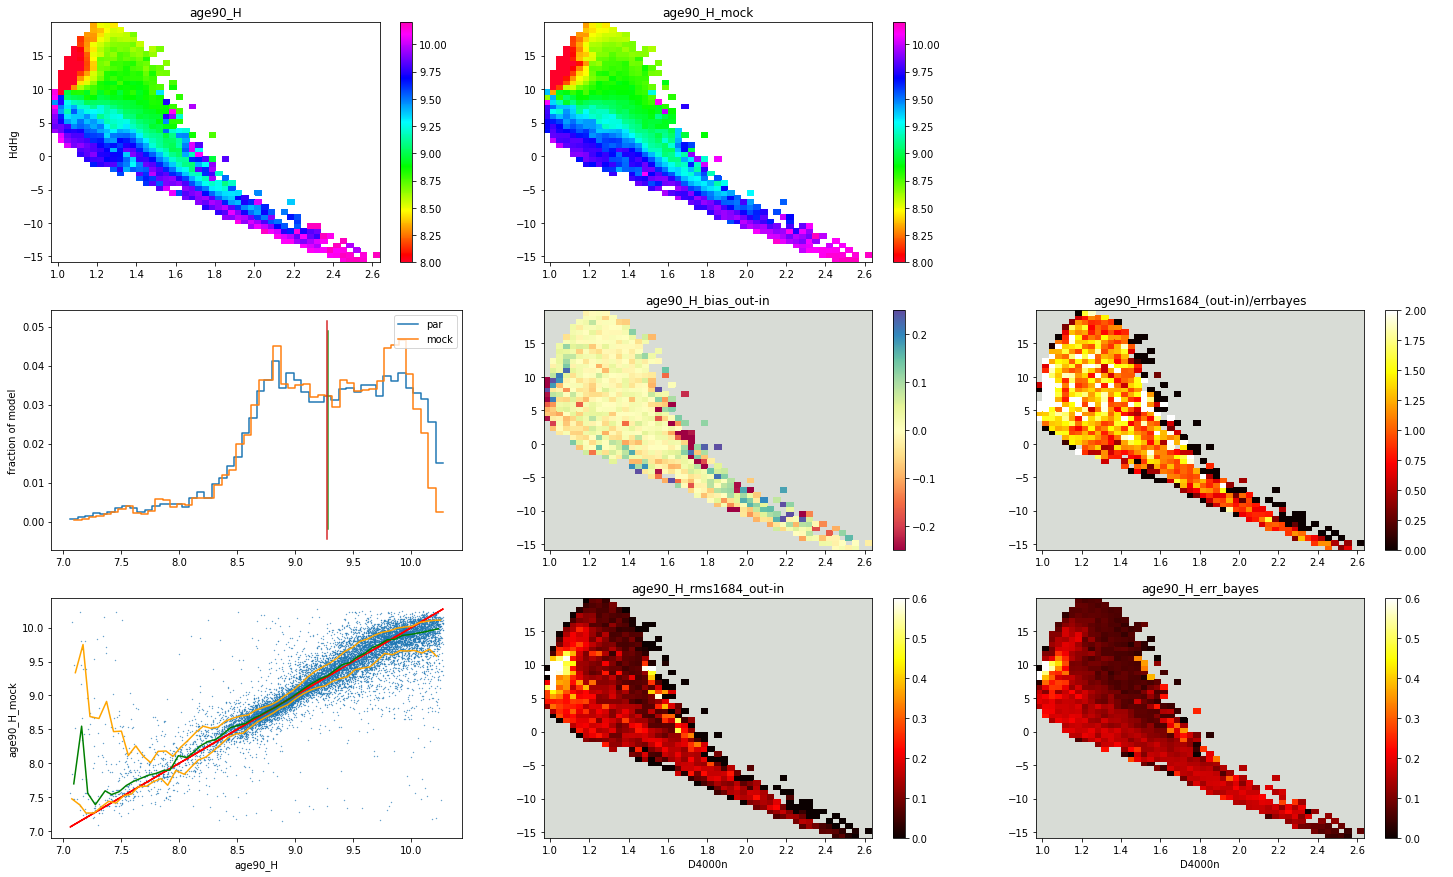

In [58]:
f_90H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age90), age90H_mock, age90H_err,par_name='age90_H', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.25, 0.0, 0.0,0.0], vmax=[10.2, 0.25, 2.0,0.6,0.6], figsize=(25,15))

In [59]:
#f_90H.savefig('/home/edoardo/Desktop/TESI/figure/mock_age90H.png')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)


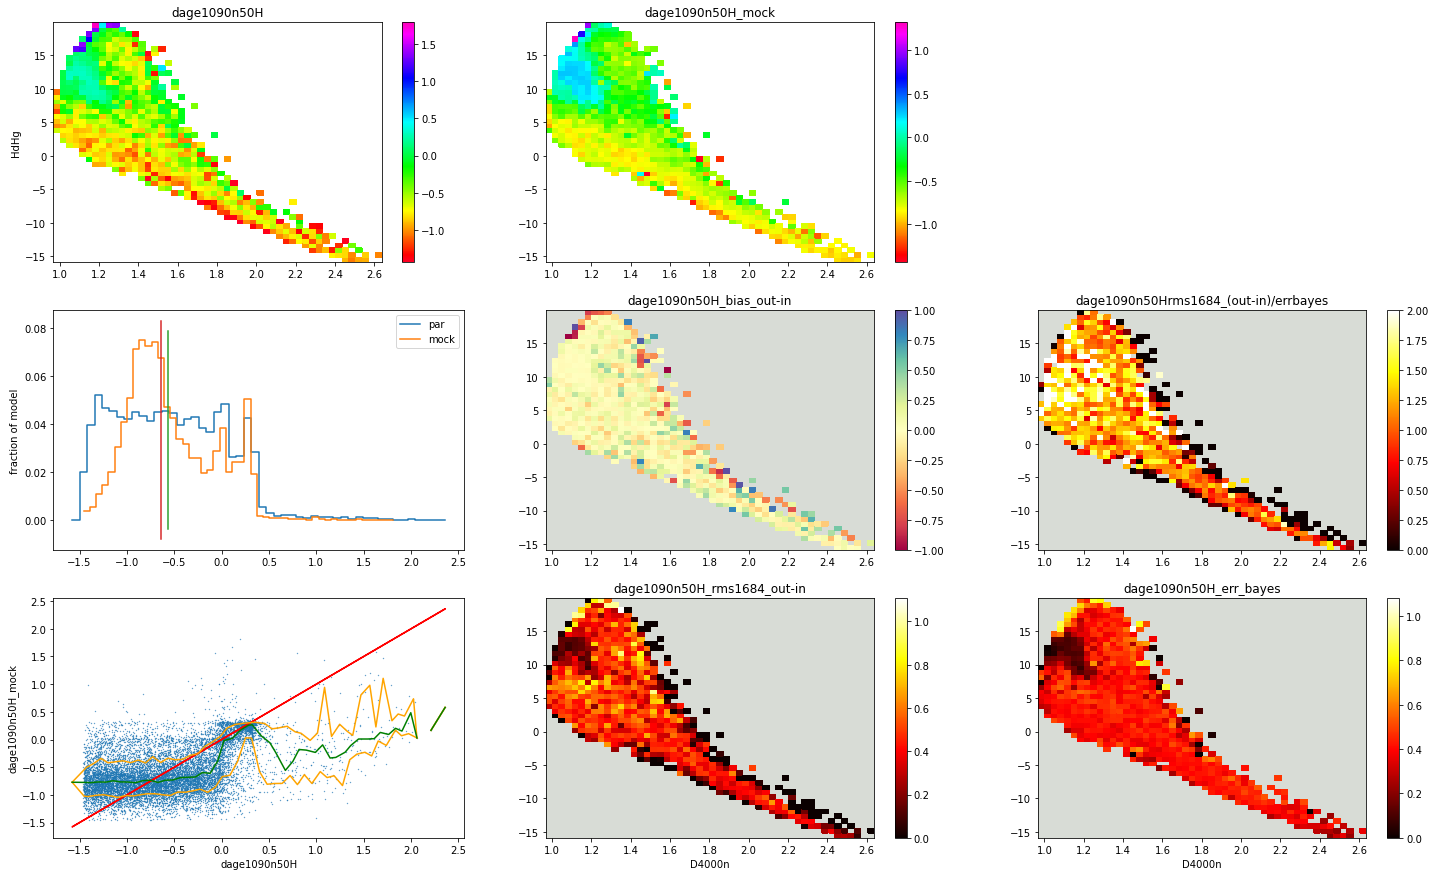

In [60]:
f_1090n50H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age90)-np.log10(age50), np.log10(dage1090n50H_mock), (dage1090n50H_err),par_name='dage1090n50H', x_label='D4000n', y_label='HdHg', vmin=[None,-1, 0.0, None,None], vmax=[None,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 1


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


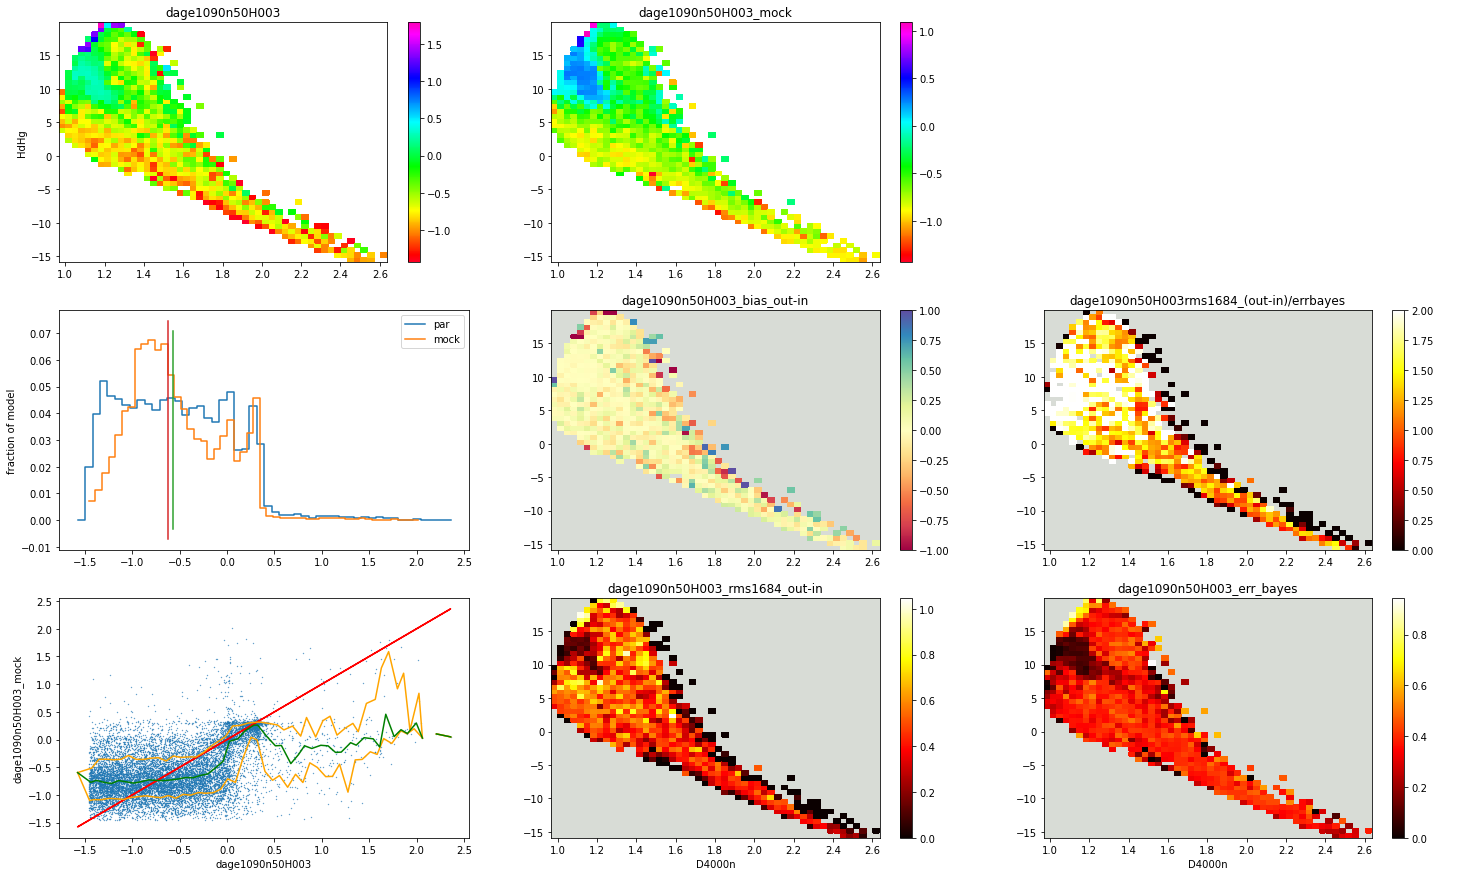

In [61]:
f_1090n50H003=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age90)-np.log10(age50), np.log10(dage1090n50H003_mock), (dage1090n50H003_err),par_name='dage1090n50H003', x_label='D4000n', y_label='HdHg', vmin=[None,-1, 0.0, None,None], vmax=[None,1, 2, None,None], figsize=(25,15))

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0


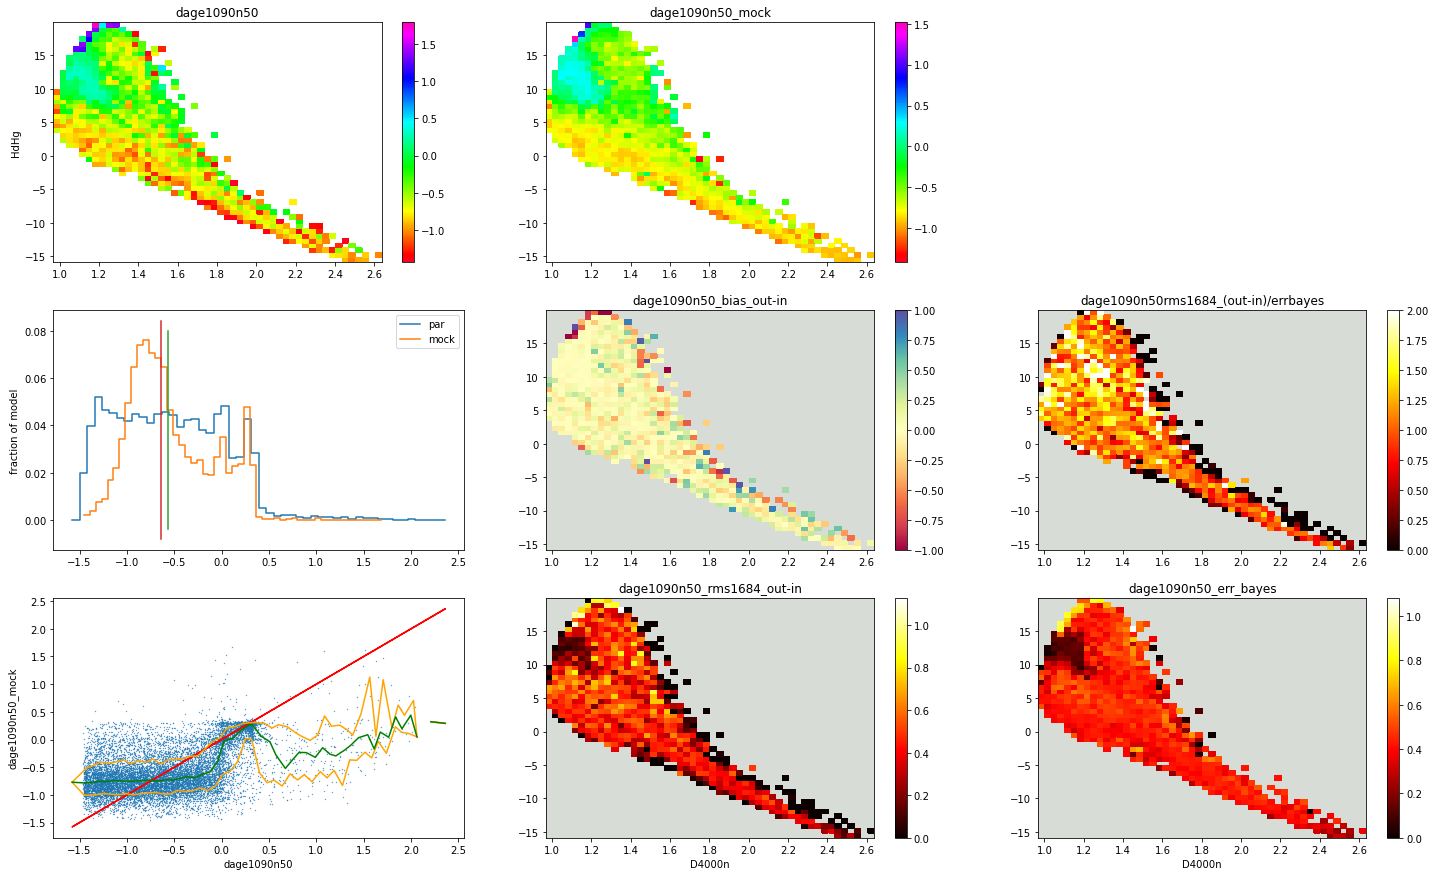

In [62]:
f_1090n50=f_plt.density_map_5p(D4000n, hdhg, np.log10(age10-age90)-np.log10(age50), np.log10(dage1090n50_mock), (dage1090n50_err),par_name='dage1090n50', x_label='D4000n', y_label='HdHg', vmin=[None,-1, 0.0, None,None], vmax=[None,1, 2, None,None], figsize=(25,15))

In [63]:
#f_1090n50.savefig('/home/edoardo/Desktop/TESI/figure/mock_dage1090n50.png')

<ipython-input-64-7c133f643dc3>:1: RuntimeWarning: divide by zero encountered in log10
  f_5090n50H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50-age90)-np.log10(age50), np.log10(dage5090n50H_mock), (dage5090n50H_err),par_name='dage5090n50H', x_label='D4000n', y_label='HdHg', vmin=[None,-1, 0.0, None,None], vmax=[None,1, 2, None,None], figsize=(25,15))


total deleted (no finite values): 490


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:54: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r_1684=(perc_84-perc_16)/2.0
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3981: RuntimeWarning: invalid value encountered in add
  r = add(x1, x2)


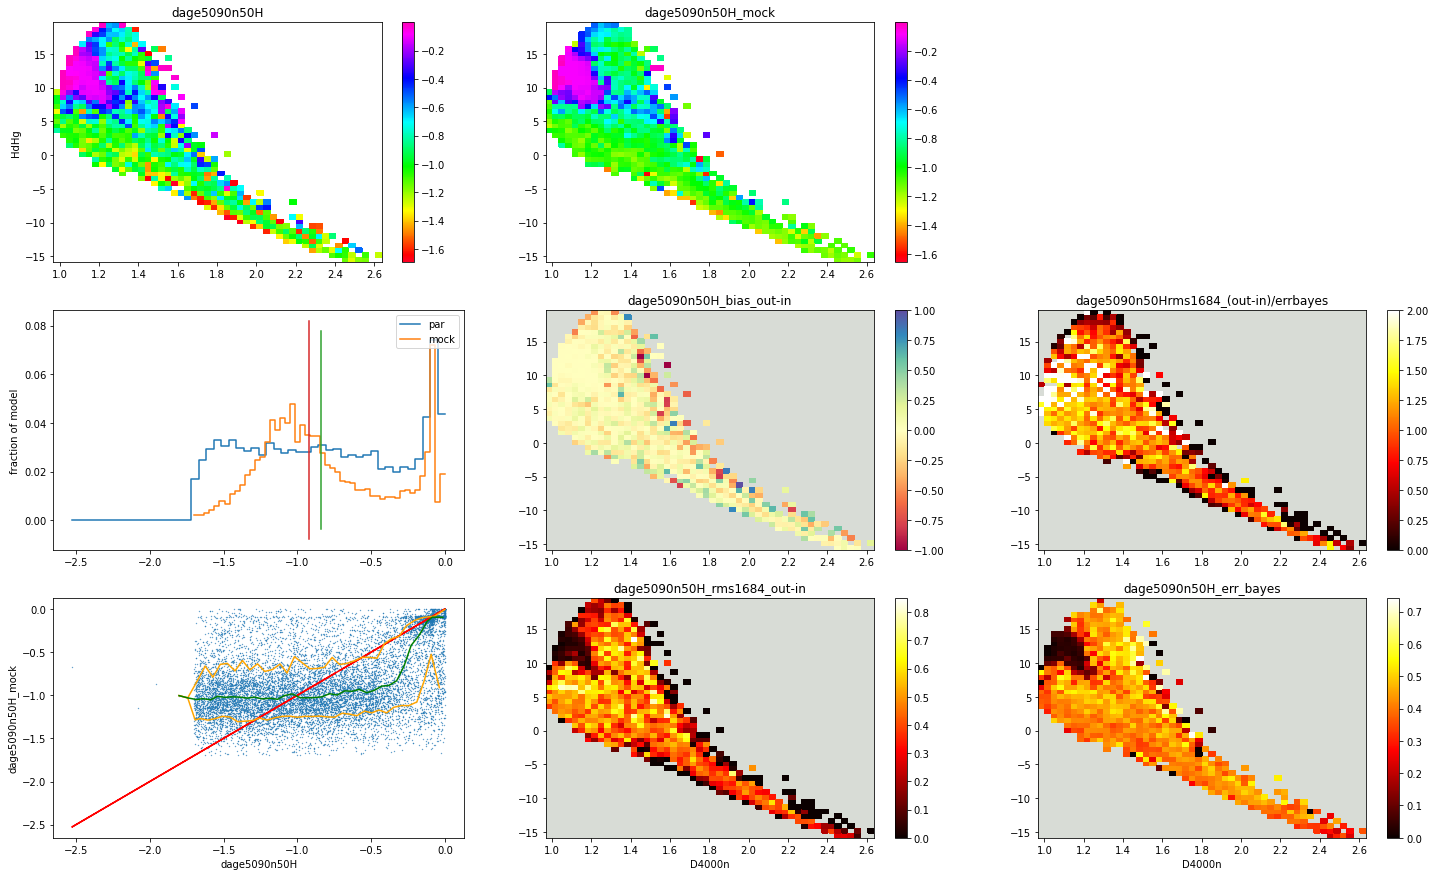

In [64]:
f_5090n50H=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50-age90)-np.log10(age50), np.log10(dage5090n50H_mock), (dage5090n50H_err),par_name='dage5090n50H', x_label='D4000n', y_label='HdHg', vmin=[None,-1, 0.0, None,None], vmax=[None,1, 2, None,None], figsize=(25,15))

In [65]:
#f_1090n50H.savefig('/home/edoardo/Desktop/TESI/figure/mock_dage1090n50H.png')

In [66]:
_idxnan=~np.isfinite(dage1090H_err)

In [67]:
dage1090H_err[_idxnan]

array([], dtype=float32)

In [68]:
np.where(_idxnan==True)

(array([], dtype=int64),)

In [69]:
_idxnan=[845,1296,1315,2141,5495,6373,6733,7090,8184,8274,8887,9043,10063,10074,10210,10496,10515,10693,12069,12291]

In [70]:
age50H_mock[_idxnan]

array([ 9.627536, 10.068051,  9.81332 ,  8.941085, 10.026181, 10.118573,
       10.221692, 10.031738,  9.778872,  9.863526,  9.750424, 10.031738,
        9.812138, 10.247418, 10.073504,  9.778872,  9.073608,  9.971509,
        9.863526, 10.012049], dtype=float32)

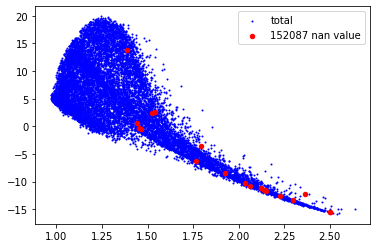

In [71]:
nan_tot=np.sum(_idxnan)
plt.scatter(D4000n, hdhg, s=1, color='blue', label='total')
plt.scatter(D4000n[_idxnan], hdhg[_idxnan], s=20, color='red', label=str(nan_tot)+' nan value')

plt.legend(loc='upper right')

In [72]:
abmag_H[_idxnan]

array([6.901907 , 6.550927 , 6.6089797, 5.449487 , 6.902194 , 6.470835 ,
       6.7010403, 6.637938 , 6.841987 , 7.145716 , 7.365122 , 6.7028284,
       6.490533 , 6.335041 , 6.9115396, 7.137486 , 5.927404 , 6.746861 ,
       6.7467303, 6.59178  ], dtype=float32)

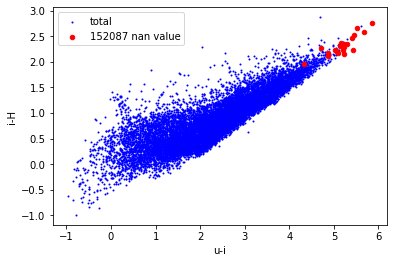

In [73]:
nan_tot=np.sum(_idxnan)
plt.scatter(abmag_u-abmag_i, abmag_i-abmag_H, s=1, color='blue', label='total')
plt.scatter(abmag_u[_idxnan]-abmag_i[_idxnan],abmag_i[_idxnan]-abmag_H[_idxnan] , s=20, color='red', label=str(nan_tot)+' nan value')
plt.xlabel('u-i')
plt.ylabel('i-H')

plt.legend(loc='upper left')

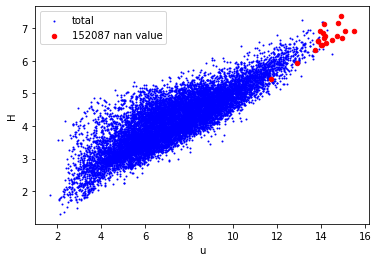

In [74]:
plt.scatter(abmag_u, abmag_H, s=1, color='blue', label='total')
plt.scatter(abmag_u[_idxnan],abmag_H[_idxnan] , s=20, color='red', label=str(nan_tot)+' nan value')
plt.xlabel('u')
plt.ylabel('H')

plt.legend(loc='upper left')

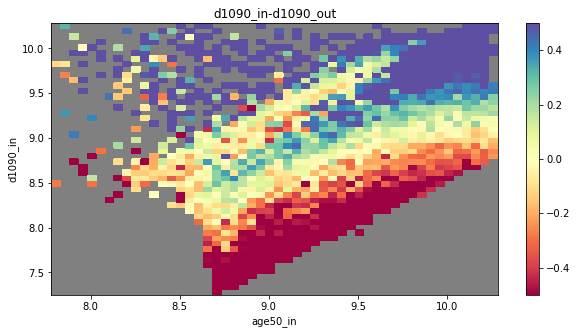

In [75]:
f_diff1090=f_plt.diff_density_map(np.log10(age50), np.log10(age10-age90), np.log10(age10-age90), np.log10(dage1090_mock),statistic='median',name1='d1090_in',name2='d1090_out',xlabel='age50_in',ylabel='d1090_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

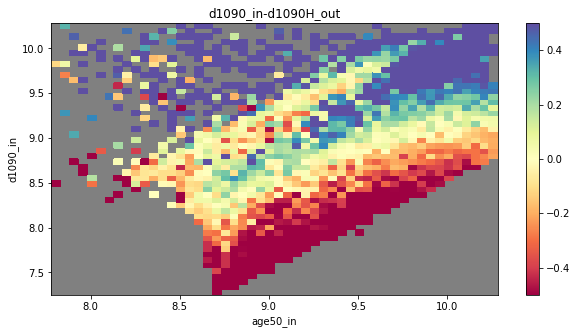

In [76]:
f_diff1090H=f_plt.diff_density_map(np.log10(age50), np.log10(age10-age90), np.log10(age10-age90), np.log10(dage1090H_mock),statistic='median',name1='d1090_in',name2='d1090H_out',xlabel='age50_in',ylabel='d1090_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

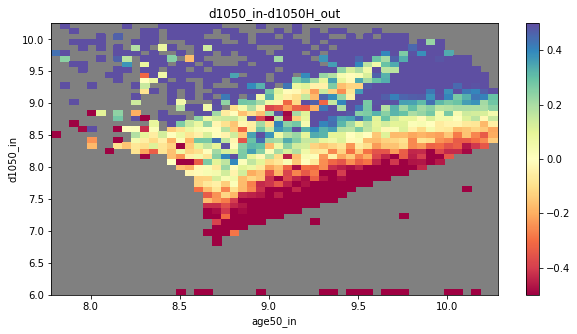

In [77]:
f_diff1050H=f_plt.diff_density_map(np.log10(age50), np.log10(age10-age50+10**6), np.log10(age10-age50+10**6), np.log10(dage1050H_mock+10**6),statistic='median',name1='d1050_in',name2='d1050H_out',xlabel='age50_in',ylabel='d1050_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

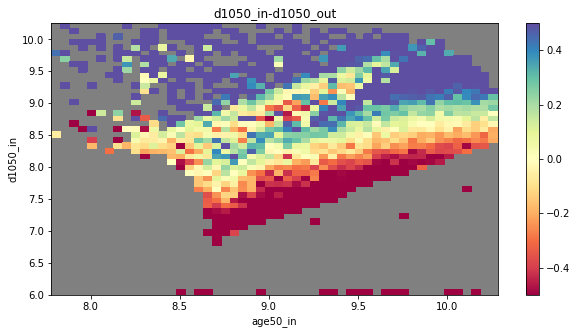

In [78]:
f_diff1050=f_plt.diff_density_map(np.log10(age50), np.log10(age10-age50+10**6), np.log10(age10-age50+10**6), np.log10(dage1050_mock+10**6),statistic='median',name1='d1050_in',name2='d1050_out',xlabel='age50_in',ylabel='d1050_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

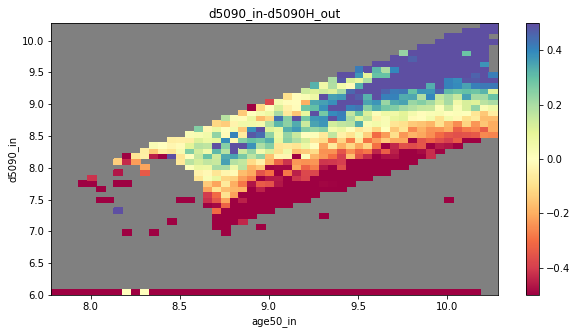

In [79]:
f_diff5090H=f_plt.diff_density_map(np.log10(age50), np.log10(age50-age90+10**6), np.log10(age50-age90+10**6), np.log10(dage5090H_mock+10**6),statistic='median',name1='d5090_in',name2='d5090H_out',xlabel='age50_in',ylabel='d5090_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

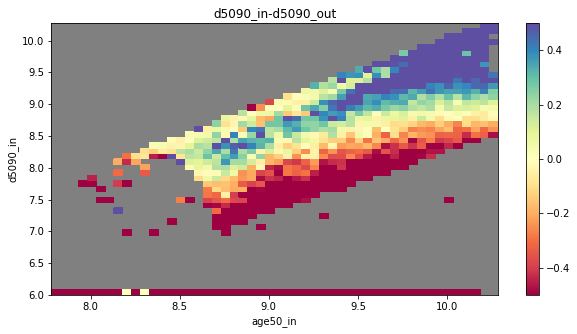

In [80]:
f_diff5090=f_plt.diff_density_map(np.log10(age50), np.log10(age50-age90+10**6), np.log10(age50-age90+10**6), np.log10(dage5090_mock+10**6),statistic='median',name1='d5090_in',name2='d5090_out',xlabel='age50_in',ylabel='d5090_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

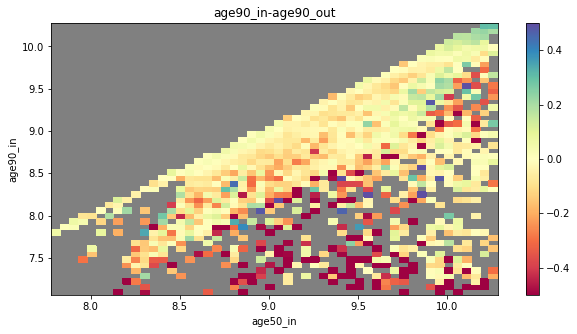

In [81]:
f_diff90=f_plt.diff_density_map(np.log10(age50), np.log10(age90), np.log10(age90), (age90_mock),statistic='median',name1='age90_in',name2='age90_out',xlabel='age50_in',ylabel='age90_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

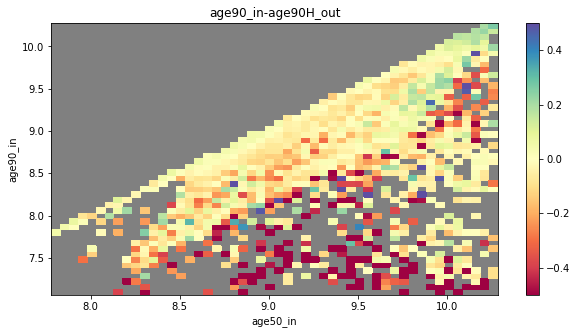

In [82]:
f_diff90H=f_plt.diff_density_map(np.log10(age50), np.log10(age90), np.log10(age90), (age90H_mock),statistic='median',name1='age90_in',name2='age90H_out',xlabel='age50_in',ylabel='age90_in',figsize=(10,5),vmin=-0.5,vmax=0.5 )

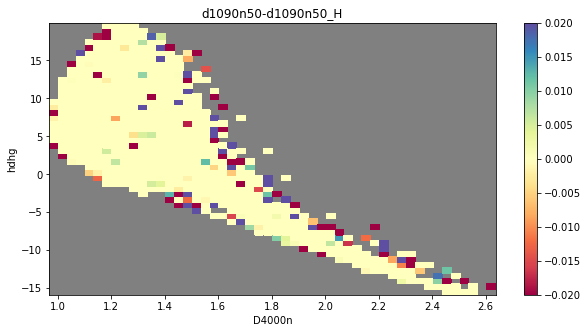

In [83]:
f_diff1090=f_plt.diff_density_map((D4000n), hdhg, dage1090n50_mock, dage1090n50H_mock,statistic='median',name1='d1090n50',name2='d1090n50_H',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.02,vmax=0.02 )

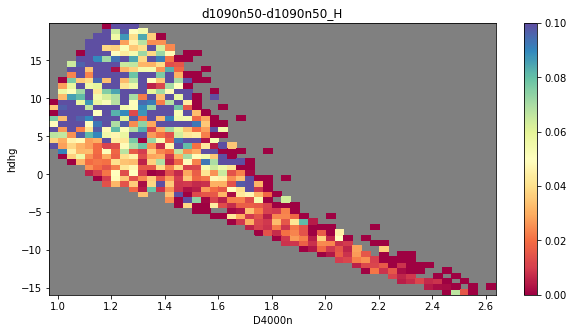

In [84]:
f_diff1090rms=f_plt.diff_density_map((D4000n), hdhg, dage1090n50_mock, dage1090n50H_mock,statistic=f_plt.rms_1684,name1='d1090n50',name2='d1090n50_H',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=0.0,vmax=0.1 )

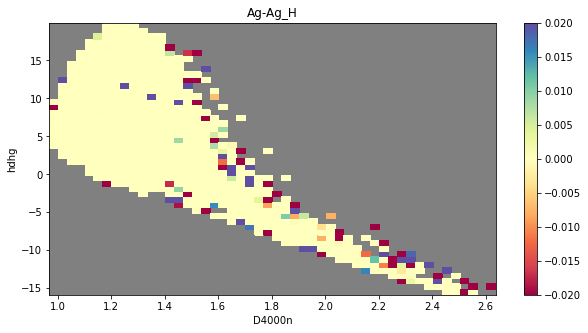

In [85]:
f_diffAg=f_plt.diff_density_map((D4000n), hdhg, Ag_mock, Ag_H_mock,statistic='median',name1='Ag',name2='Ag_H',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.02,vmax=0.02 )

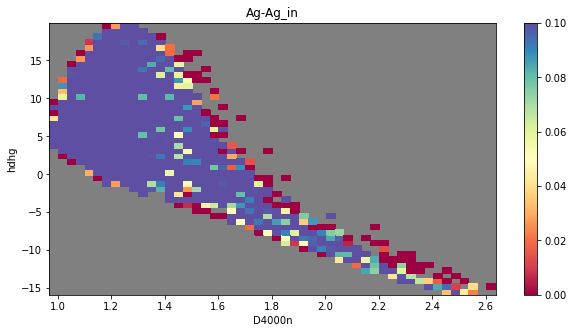

In [86]:
f_diffAg,ax, Ag_rms_arr=f_plt.diff_density_map((D4000n), hdhg, Ag_mock, Ag,statistic=f_plt.rms_1684,name1='Ag',name2='Ag_in',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=0.0,vmax=0.1 )

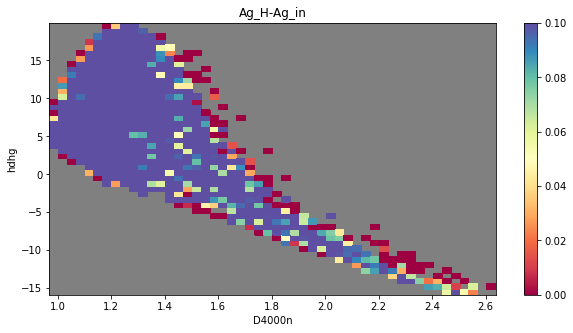

In [87]:
f_diffAg_H,ax_H, AgH_rms_arr=f_plt.diff_density_map((D4000n), hdhg, Ag_H_mock, Ag,statistic=f_plt.rms_1684,name1='Ag_H',name2='Ag_in',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=0.0,vmax=0.1 )

In [88]:
np.nanmedian(AgH_rms_arr-Ag_rms_arr)

0.0

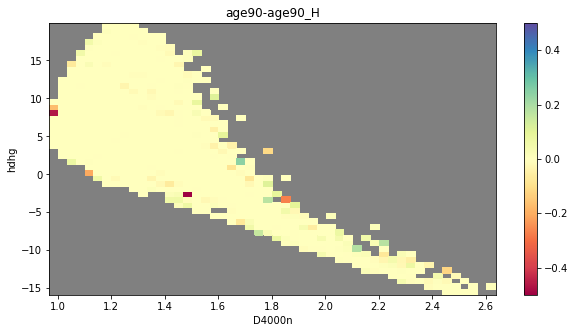

In [89]:
f_diff90=f_plt.diff_density_map((D4000n), hdhg, age90_mock, age90H_mock,statistic='median',name1='age90',name2='age90_H',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.5,vmax=0.5 )

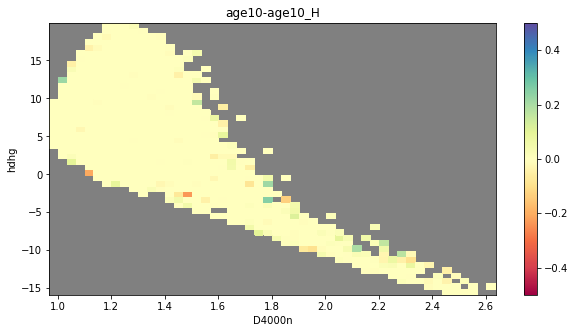

In [90]:
f_diff10=f_plt.diff_density_map((D4000n), hdhg, age10_mock, age10H_mock,statistic='median',name1='age10',name2='age10_H',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.5,vmax=0.5 )

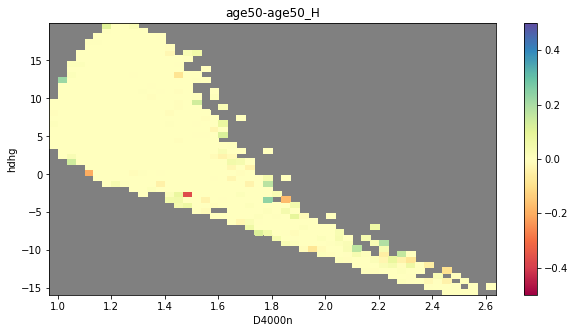

In [91]:
f_diff50=f_plt.diff_density_map((D4000n), hdhg, age50_mock, age50H_mock,statistic='median',name1='age50',name2='age50_H',xlabel='D4000n',ylabel='hdhg',figsize=(10,5),vmin=-0.5,vmax=0.5 )

In [107]:
idx_d1090gt=np.where((age10-age90)/age50>0.5)[0]
age50gt=age50[idx_d1090gt]
age10gt=age10[idx_d1090gt]
age90gt=age90[idx_d1090gt]
d1090n50gt_err=dage1090n50_err[idx_d1090gt]
d1090n50gt_mock=dage1090n50_mock[idx_d1090gt]
D4000ngt=D4000n[idx_d1090gt]
hdhggt=hdhg[idx_d1090gt]

In [108]:
new_istpar=np.histogram(np.log10((age10-age90)/age50), bins=50)
istmock_tot=np.histogram(np.log10(dage1090n50_mock), bins=50)
frac_par=new_istpar[0]/np.size(age10)
frac_mock=istmock_tot[0]/np.size(dage1090n50_mock)
frac_par=np.append(frac_par[0],frac_par)
frac_mock=np.append(frac_mock[0], frac_mock)


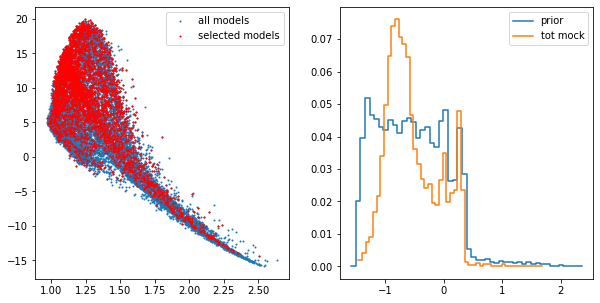

In [109]:
fig, axs=plt.subplots(1, 2, figsize=(10,5))
axs[0].scatter(D4000n, hdhg, s=1, label='all models')
axs[0].scatter(D4000ngt, hdhggt, color='red',s=1, label='selected models')
axs[1].step(new_istpar[1], frac_par, label='prior')
axs[1].step(istmock_tot[1], frac_mock, label='tot mock')
axs[1].legend(loc='upper right')
axs[0].legend(loc='upper right')